<img src="https://logos-world.net/wp-content/uploads/2021/08/Forbes-Emblem.png" alt="Alternative Text" width="200" height="200">

## Dataset Overview: 

The Forbes Billionaires dataset provides information about the world's billionaires, including their rankings, net worth, age, country of origin, source of wealth, and industry affiliation. This analysis aims to gain insights into the wealth distribution, age demographics, geographical distribution, and the dominant industries among billionaires.

### Columns:
- **Rank**: Represents the ranking of each billionaire based on their net worth.
- **Name**: Refers to the name of the billionaire.
- **Net Worth**: Indicates the estimated net worth of the billionaire in billions of dollars.
- **Age**: Represents the age of the billionaire.
- **Country**: Refers to the country of origin or citizenship of the billionaire.
- **Source**: Represents the primary source or avenue through which the billionaire has accumulated their wealth.
- **Industry**: Indicates the industry or sector in which the billionaire's primary business interests lie.

### Objective:
The objective of this analysis is to uncover the wealth distribution among billionaires and identify the countries, industries, and sources that have produced the most wealth. By exploring the Forbes Billionaires dataset, we aim to address the following key points:

- What are the key demographic characteristics of billionaires, such as age distribution and geographical representation?
- How is wealth distributed among billionaires? Identify the countries with the highest number of billionaires and the countries that have most wealth.
- Which industries have the highest representation among billionaires, and what are the dominant sources of wealth? Identify the primary avenues or industries that have contributed to their net worth.
- Are there any correlations or relationships between age, net worth, industry, and source of wealth?
- Analyze the industry affiliations of billionaires to identify the sectors that have produced the most billionaires and accumulated significant wealth.
- By conducting this analysis, we can gain a deeper understanding of the world's billionaires and uncover valuable insights about wealth accumulation, industry dynamics of the wealthiest individuals.

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

## Loading the Dataset

In [2]:
df = pd.read_excel('forbes.xlsx')
df.head()

,rank,name,net_worth,age,country,source,industry
0,1,Bernard Arnault & family,$211 B,74.0,France,LVMH,Fashion & Retail
1,2,Elon Musk,$180 B,51.0,United States,"Tesla, SpaceX",Automotive
2,3,Jeff Bezos,$114 B,59.0,United States,Amazon,Technology
3,4,Larry Ellison,$107 B,78.0,United States,Oracle,Technology
4,5,Warren Buffett,$106 B,92.0,United States,Berkshire Hathaway,Finance & Investments


## Exploring the Dataset

In [3]:
df.shape

(2654, 7)

## Looking for duplicates in the dataset

In [4]:
duplicate_values = df.duplicated().value_counts()
duplicate_values

False    2640
True       14
Name: count, dtype: int64

In [5]:
duplicate_values = df.duplicated()
true_df = df[duplicate_values]
true_df

,rank,name,net_worth,age,country,source,industry
2553,2540,Lu Yonghua & family,$1 B,59.0,China,Electronics,Technology
2566,2540,Apoorva Mehta,$1 B,36.0,Canada,Grocery delivery service,Technology
2569,2540,Ma Xiuhui,$1 B,52.0,China,LED lighting,Manufacturing
2577,2540,Gabriella Meister,$1 B,NaN,Germany,Appliances,Manufacturing
2591,2540,Andrei Molchanov,$1 B,51.0,Russia,Construction materials,Construction & Engineering
2594,2540,Ulrike Meister,$1 B,56.0,Germany,Appliances,Manufacturing
2602,2540,Fulvio MontipÃ² & family,$1 B,78.0,Italy,Hydraulic pumps,Manufacturing
2610,2540,Stanley Motta,$1 B,77.0,Panama,Finance,Finance & Investments
2618,2540,Tyler Perry,$1 B,53.0,United States,"Movies, television",Media & Entertainment
2626,2540,RÃ©al Plourde,$1 B,NaN,Canada,Convenience stores,Fashion & Retail


## Removing duplicate values in the dataframe

In [6]:
df = df.drop_duplicates()
df.shape

(2640, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2640 entries, 0 to 2652
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rank       2640 non-null   int64  
 1   name       2640 non-null   object 
 2   net_worth  2640 non-null   object 
 3   age        2575 non-null   float64
 4   country    2640 non-null   object 
 5   source     2640 non-null   object 
 6   industry   2640 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 165.0+ KB


## Handling the "net_worth" column

### stripping values "$" and "B" 

In [8]:
df['net_worth']

0       $211 B
1       $180 B
2       $114 B
3       $107 B
4       $106 B
         ...  
2647      $1 B
2648      $1 B
2649      $1 B
2650      $1 B
2652      $1 B
Name: net_worth, Length: 2640, dtype: object

In [9]:
# alternate way: df['net_worth'] = df['net_worth'].str.strip('$').str.strip('B')

df['net_worth'] = df['net_worth'].str.strip('$').str.strip('B')
df['net_worth']

0       211 
1       180 
2       114 
3       107 
4       106 
        ... 
2647      1 
2648      1 
2649      1 
2650      1 
2652      1 
Name: net_worth, Length: 2640, dtype: object

### changing Dtype form object to int64

In [10]:
# alternate way: df['net_worth'] = pd.to_numeric(df['net_worth'])

df['net_worth'] = df['net_worth'].astype(float)
df['net_worth'].dtype

dtype('float64')

## Checking for null values

In [11]:
df.isnull().sum()

rank          0
name          0
net_worth     0
age          65
country       0
source        0
industry      0
dtype: int64

### Displaying the summary statistics of numeric columns

In [12]:
df.describe()

,rank,net_worth,age
count,2640.000000,2640.000000,2575.000000
mean,1289.159091,4.623788,65.139029
std,739.693726,9.834241,13.258623
min,1.000000,1.000000,18.000000
25%,659.000000,1.500000,56.000000
50%,1312.000000,2.300000,65.000000
75%,1905.000000,4.200000,75.000000
max,2540.000000,211.000000,101.000000


### Who is the richest billionaire in the list?

In [13]:
df.loc[0]

rank                                1
name         Bernard Arnault & family
net_worth                       211.0
age                              74.0
country                        France
source                           LVMH
industry             Fashion & Retail
Name: 0, dtype: object

### Who are the top 10 billionaires on the list?

In [14]:
top_10 = df[['name','net_worth']].head(10)
top_10

,name,net_worth
0,Bernard Arnault & family,211.0
1,Elon Musk,180.0
2,Jeff Bezos,114.0
3,Larry Ellison,107.0
4,Warren Buffett,106.0
5,Bill Gates,104.0
6,Michael Bloomberg,94.5
7,Carlos Slim Helu & family,93.0
8,Mukesh Ambani,83.4
9,Steve Ballmer,80.7


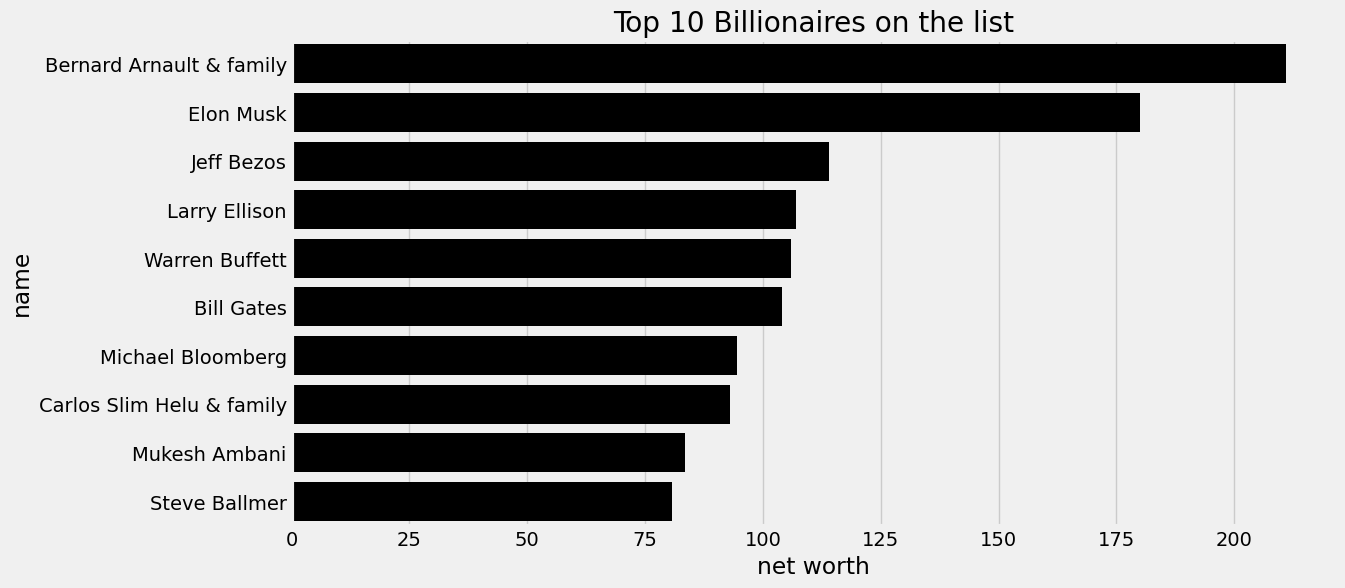

In [15]:
plt.figure(figsize=(12,6))

sns.barplot(data=top_10, x='net_worth', y='name', color='Black')

plt.title('Top 10 Billionaires on the list')
plt.xlabel('net worth')
plt.ylabel('name')
plt.show()

### What is the distribution of net worth in the dataset? 

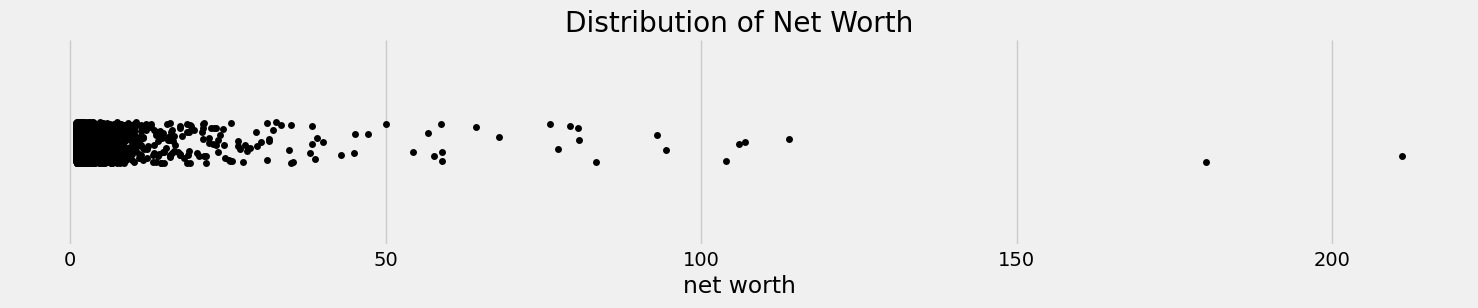

In [16]:
sns.catplot(x="net_worth", jitter=True, height=3, aspect=5, color='Black', data=df)

plt.title('Distribution of Net Worth')
plt.xlabel('net worth')
plt.ylabel('')
plt.show()

### Looking at the distribution after flitering the top 10 billionaires 

In [17]:
filter_top10 = df.loc[df.index > 10]
filter_top10.head()

,rank,name,net_worth,age,country,source,industry
11,12,Larry Page,79.2,50.0,United States,Google,Technology
12,13,Amancio Ortega,77.3,87.0,Spain,Zara,Fashion & Retail
13,14,Sergey Brin,76.0,49.0,United States,Google,Technology
14,15,Zhong Shanshan,68.0,68.0,China,"Beverages, pharmaceuticals",Food & Beverage
15,16,Mark Zuckerberg,64.4,38.0,United States,Facebook,Technology


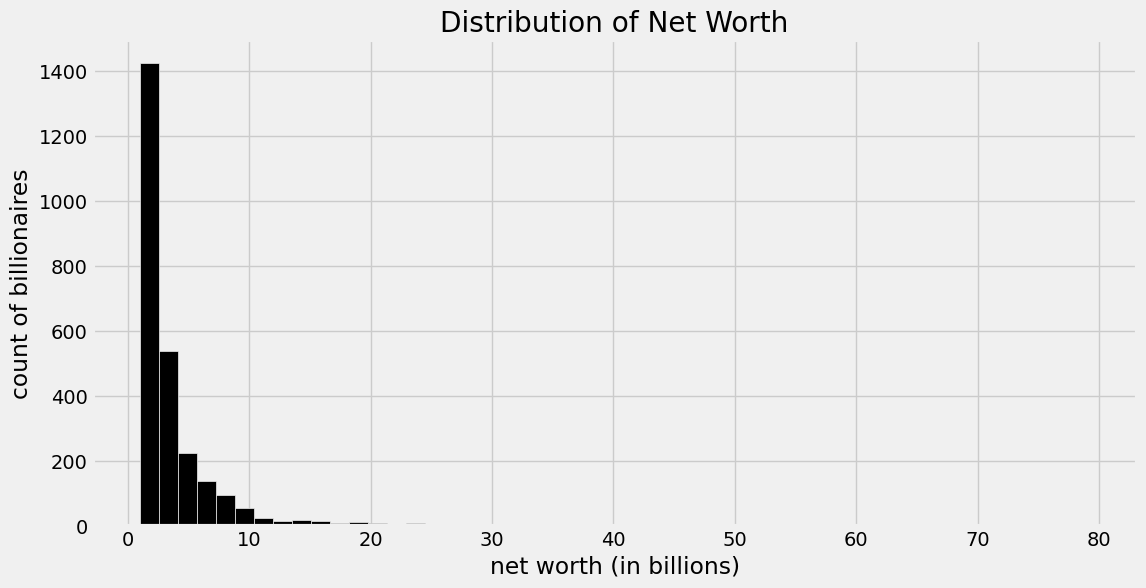

In [18]:
plt.figure(figsize=(12,6))

sns.histplot(data=filter_top10, x='net_worth', color='Black', bins=50, alpha=1)

plt.xlabel('net worth (in billions)')
plt.ylabel('count of billionaires')
plt.title('Distribution of Net Worth')
plt.show()

### What is the average net worth in the dataset? 

In [19]:
print('The average net worth in the dataset:')
print('----------------------------------------------')

avg_net_worth = df['net_worth'].mean().round(2)
avg_net_worth

The average net worth in the dataset:
----------------------------------------------


4.62

#### How many billionaires have a net worth above the list average?

In [20]:
print('Billionaires that have a net worth equal or above the list average:')
print('------------------------------------------------------------------------')

billionairs_networth_above_avg = (df['net_worth'] >= avg_net_worth).sum()
billionairs_networth_above_avg

Billionaires that have a net worth equal or above the list average:
------------------------------------------------------------------------


590

#### How many billionaires have a net worth below the list average?

In [21]:
print('Billionaires that have a net worth below the list average:')
print('-----------------------------------------------------------------')

billionairs_networth_below_avg = (df['net_worth'] < avg_net_worth).sum()
billionairs_networth_below_avg

Billionaires that have a net worth below the list average:
-----------------------------------------------------------------


2050

### How many different countries are there in the list?

In [22]:
unique_countries = df['country'].nunique()
unique_countries

77

### Which country has the most number of billionaires?

In [23]:
most_billionaires = df['country'].value_counts()
most_billionaires

country
United States           735
China                   495
India                   169
Germany                 126
Russia                  104
                       ... 
Belize                    1
Venezuela                 1
Eswatini (Swaziland)      1
Algeria                   1
Bangladesh                1
Name: count, Length: 77, dtype: int64

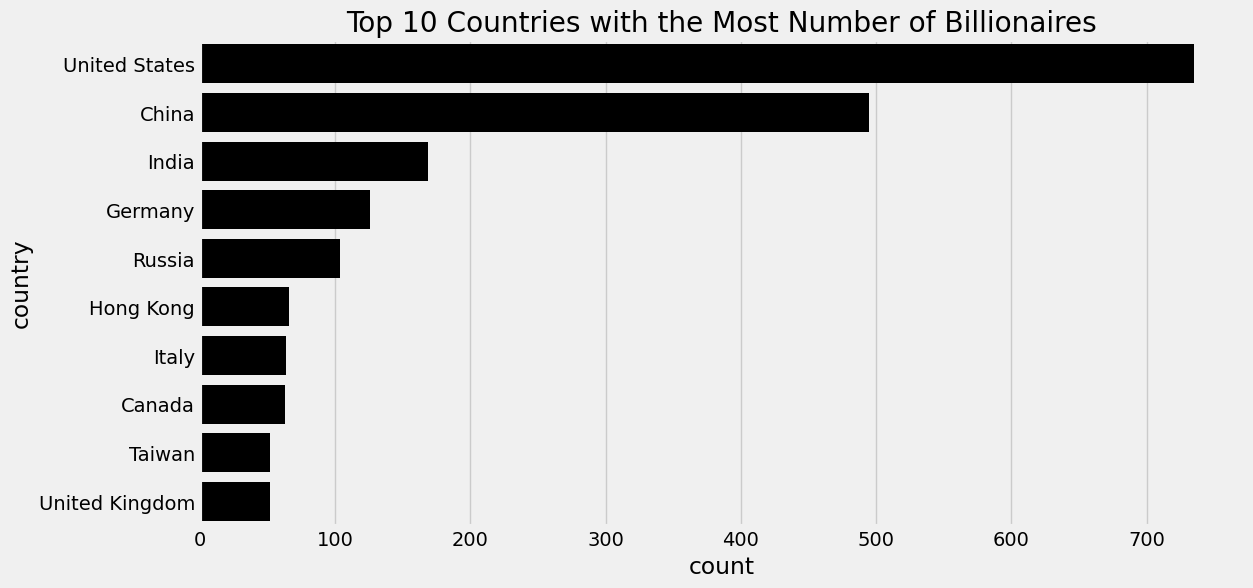

In [24]:
plt.figure(figsize=(12,6))

most_billionaires = most_billionaires.head(10)

sns.barplot(y=most_billionaires.index, x=most_billionaires.values, color='black')

plt.xlabel('count')
plt.ylabel('country')
plt.title('Top 10 Countries with the Most Number of Billionaires')
plt.show()

### Which country holds the largest share of billionaires' wealth?

In [25]:
country_with_most_billions = df.groupby('country')['net_worth'].sum().sort_values(ascending=False)
country_with_most_billions

country
United States    4490.8
China            1668.3
India             674.8
France            590.0
Germany           585.4
                  ...  
Macau               1.3
Estonia             1.3
Armenia             1.2
Panama              1.0
Bangladesh          1.0
Name: net_worth, Length: 77, dtype: float64

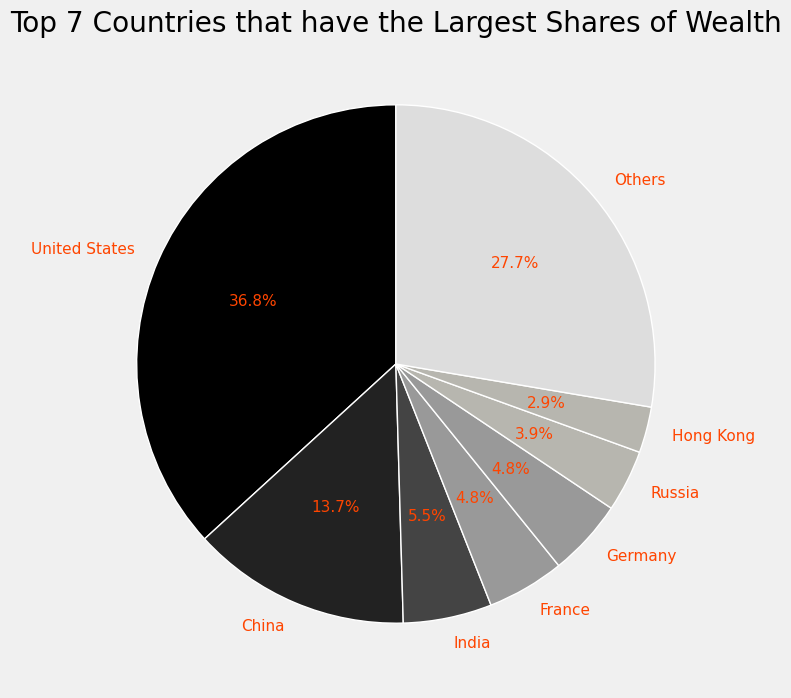

In [26]:
plt.figure(figsize=(8,8))

top5_country_with_most_billions = country_with_most_billions[:7]
other_country_with_most_billions = country_with_most_billions[7:].sum().round()

labels = list(top5_country_with_most_billions.index) + ['Others']

values = list(top5_country_with_most_billions.values) + [other_country_with_most_billions]

colors = ['#000000', '#222222', '#444444', '#999999', '#999999', '#b7b6af', '#b7b6af', '#dddddd']

wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}
textprops = {'color': 'Orangered', 'size':11}

plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops, textprops=textprops)

plt.title("Top 7 Countries that have the Largest Shares of Wealth")
plt.show()

### What are the top countries that have the most billions on the list?

By setting a minimum count threshold of 10, we are essentially saying that we are interested in analyzing only those countries that appear in the dataset at least 10 times. This ensures that we are filtering out outliers or countries with low counts helps to mitigate potential biases that may arise from small sample sizes or unusual data points. It allows us to focus on countries that have a more substantial presence in the dataset, it potentially provides more reliable results in our analysis which leads to more reliable and meaningful insights.

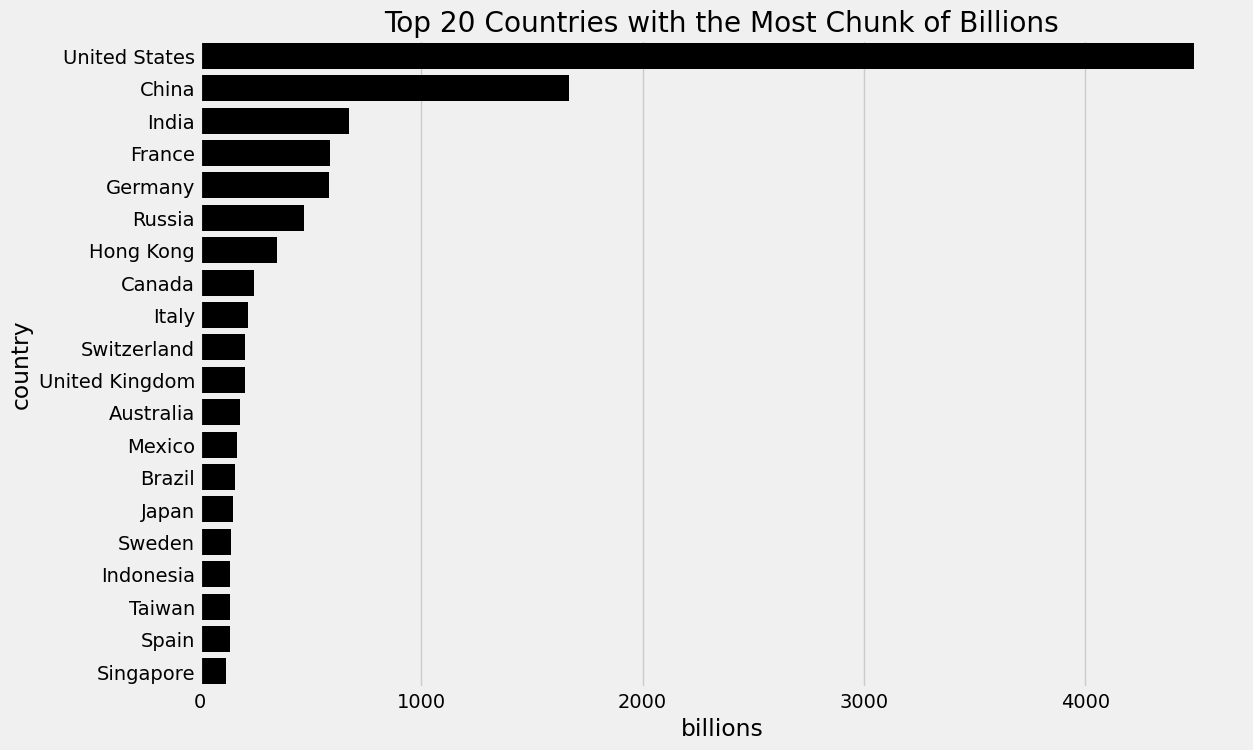

In [27]:
plt.figure(figsize=(12,8))

country_with_most_billions = country_with_most_billions.head(20)

sns.barplot(y=country_with_most_billions.index, x=country_with_most_billions.values, color='black')

plt.xlabel('billions')
plt.ylabel('country')
plt.title('Top 20 Countries with the Most Chunk of Billions')
plt.show()

### What is the average age of billionaires in each country?

In [28]:
counts = df['country'].value_counts()
filter_count = df[df['country'].isin(counts[counts >= 10].index)]
filter_count

,rank,name,net_worth,age,country,source,industry
0,1,Bernard Arnault & family,211.0,74.0,France,LVMH,Fashion & Retail
1,2,Elon Musk,180.0,51.0,United States,"Tesla, SpaceX",Automotive
2,3,Jeff Bezos,114.0,59.0,United States,Amazon,Technology
3,4,Larry Ellison,107.0,78.0,United States,Oracle,Technology
4,5,Warren Buffett,106.0,92.0,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2647,2540,Hideyuki Busujima,1.0,70.0,Japan,Pachinko machines,Gambling & Casinos
2648,2540,Du Yulin & family,1.0,50.0,China,Software,Technology
2649,2540,Danilo Iervolino,1.0,45.0,Italy,Online universities,Technology
2650,2540,Michael Kum,1.0,78.0,Singapore,Hotels,Real Estate


In [29]:
print('Average age of billionaires in each countries:')
print('---------------------------------------------------------')

country_billionaires_avg_age = filter_count.groupby('country')['age'].mean().round(2).sort_values(ascending=False)
country_billionaires_avg_age

Average age of billionaires in each countries:
---------------------------------------------------------


country
Indonesia         74.14
Taiwan            73.65
Thailand          73.56
Japan             72.64
Malaysia          72.43
Spain             69.96
Philippines       68.71
Mexico            68.64
Turkey            68.42
India             68.24
Singapore         67.94
United States     67.86
France            67.33
United Kingdom    67.28
Switzerland       67.24
Brazil            67.20
Italy             66.53
Australia         66.53
Canada            66.26
Netherlands       65.92
Hong Kong         65.47
Israel            65.23
Germany           63.71
Austria           62.36
Sweden            60.31
Russia            58.84
China             58.47
South Korea       57.31
Czech Republic    54.00
Norway            53.33
Name: age, dtype: float64

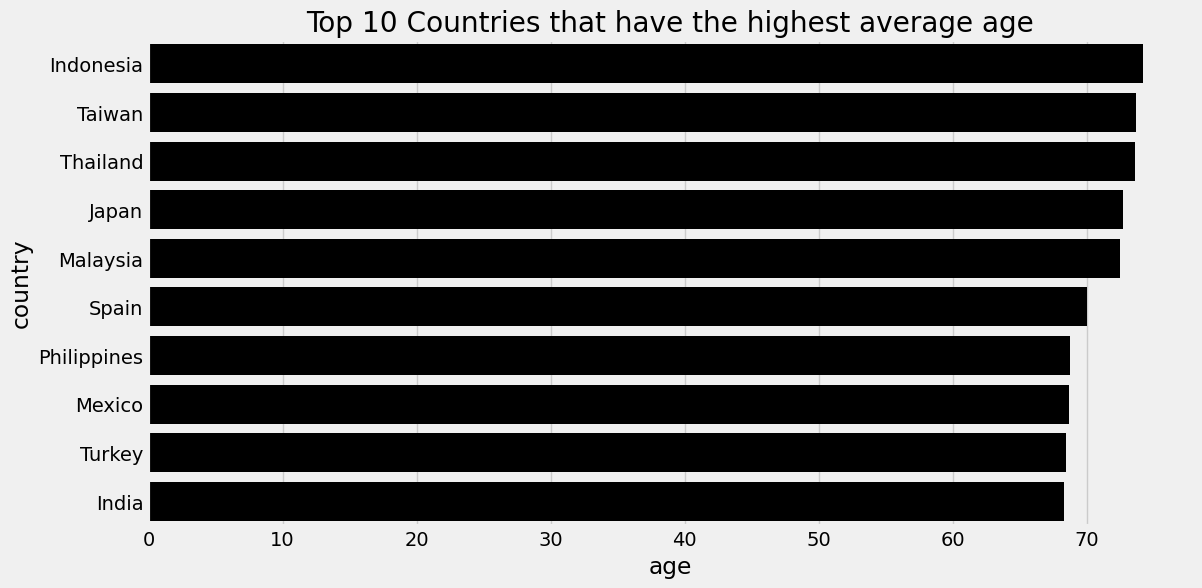

In [30]:
plt.figure(figsize=(12,6))

country_billionaires_avg_age = country_billionaires_avg_age.head(10)

sns.barplot(y=country_billionaires_avg_age.index, x=country_billionaires_avg_age.values, color='black')

plt.xlabel('age')
plt.ylabel('country')
plt.title('Top 10 Countries that have the highest average age')
plt.show()

### Which country has the highest average net worth for billionaires?

In [31]:
highest_avg_net_worth = filter_count.groupby('country')['net_worth'].median().round(2).sort_values(ascending=False)
highest_avg_net_worth

country
France            4.30
Czech Republic    4.10
Mexico            3.60
Switzerland       3.10
United States     3.00
United Kingdom    2.90
Hong Kong         2.75
Germany           2.65
Italy             2.50
Austria           2.50
Canada            2.40
Philippines       2.40
Israel            2.20
Russia            2.15
India             2.10
Taiwan            2.10
Sweden            2.10
Norway            2.00
Singapore         2.00
Australia         2.00
Thailand          1.95
Spain             1.90
Turkey            1.90
Indonesia         1.90
China             1.90
Netherlands       1.80
Brazil            1.80
South Korea       1.70
Japan             1.70
Malaysia          1.65
Name: net_worth, dtype: float64

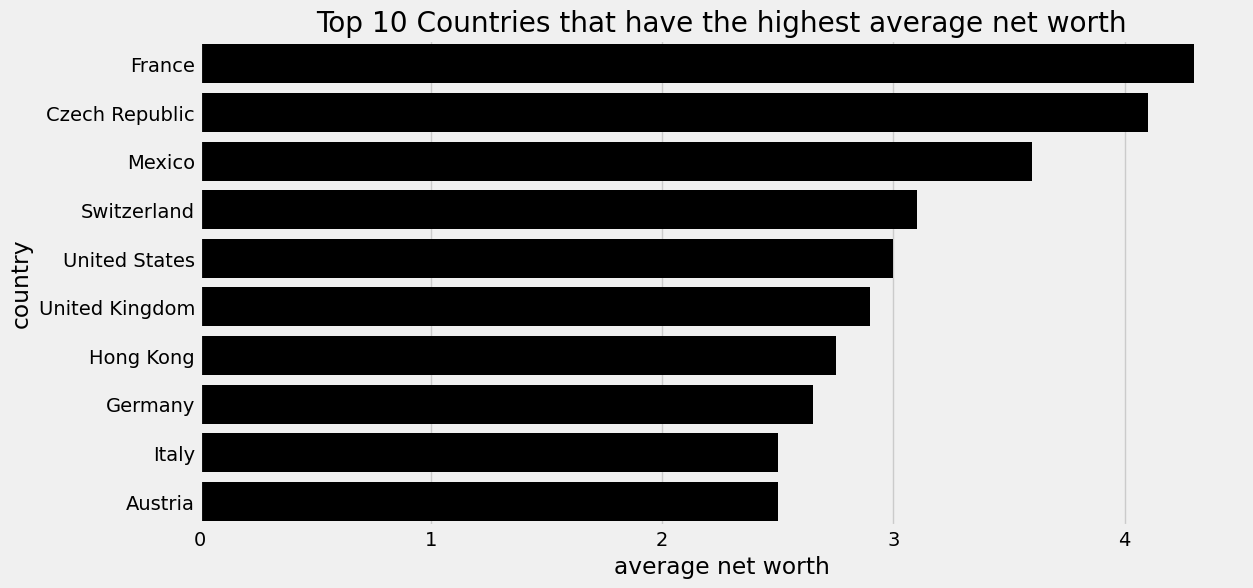

In [32]:
plt.figure(figsize=(12,6))

highest_avg_net_worth = highest_avg_net_worth.head(10)

sns.barplot(y=highest_avg_net_worth.index, x=highest_avg_net_worth.values, color='black')

plt.xlabel('average net worth')
plt.ylabel('country')
plt.title('Top 10 Countries that have the highest average net worth')
plt.show()

### If we take "mean" instead of "median" then we will get different result

In [33]:
highest_median_net_worth = filter_count.groupby('country')['net_worth'].mean().round(2).sort_values(ascending=False)
highest_median_net_worth

country
France            13.72
Mexico            12.06
Austria            6.43
United States      6.11
Czech Republic     5.58
Hong Kong          5.30
Switzerland        5.03
Spain              5.01
Indonesia          4.77
Germany            4.65
Russia             4.53
India              3.99
Australia          3.90
Canada             3.89
United Kingdom     3.88
Japan              3.78
Israel             3.78
Thailand           3.60
Sweden             3.60
Singapore          3.40
Netherlands        3.38
China              3.37
Italy              3.37
Brazil             3.15
Malaysia           3.04
Norway             3.02
Philippines        2.96
Taiwan             2.62
South Korea        2.48
Turkey             2.22
Name: net_worth, dtype: float64

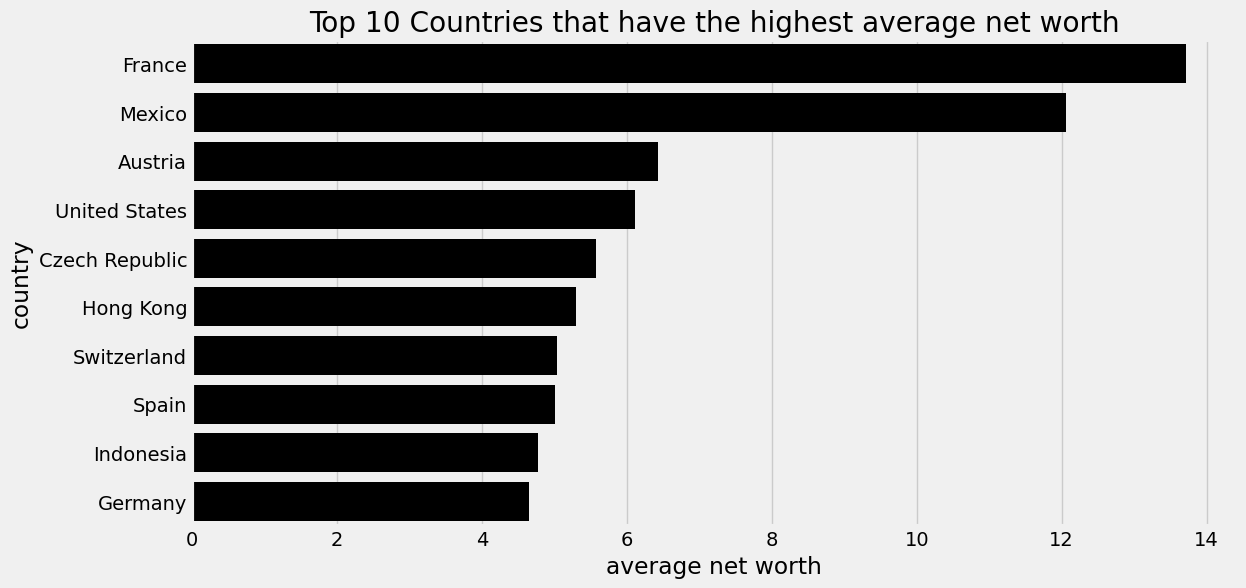

In [34]:
plt.figure(figsize=(12,6))

highest_median_net_worth = highest_median_net_worth.head(10)

sns.barplot(y=highest_median_net_worth.index, x=highest_median_net_worth.values, color='black')

plt.xlabel('average net worth')
plt.ylabel('country')
plt.title('Top 10 Countries that have the highest average net worth')
plt.show()

### Who is the richest billionaire in each country?

In [35]:
df['country'].nunique()

77

In [36]:
richest_billionaires_in_each_country = df.groupby('country').first().reset_index()
richest_billionaires_in_each_country = richest_billionaires_in_each_country.sort_values('net_worth', ascending=False)
richest_billionaires_in_each_country

,country,rank,name,net_worth,age,source,industry
22,France,1,Bernard Arnault & family,211.0,74.0,LVMH,Fashion & Retail
73,United States,2,Elon Musk,180.0,51.0,"Tesla, SpaceX",Automotive
41,Mexico,8,Carlos Slim Helu & family,93.0,83.0,Telecom,Telecom
30,India,9,Mukesh Ambani,83.4,65.0,Diversified,Diversified
62,Spain,13,Amancio Ortega,77.3,87.0,Zara,Fashion & Retail
...,...,...,...,...,...,...,...
19,Estonia,2133,Kristo KÃ¤Ã¤rmann,1.3,42.0,"Payments, banking",Finance & Investments
39,Macau,2133,Hoi Kin Hong,1.3,70.0,Real estate,Real Estate
2,Armenia,2259,Ruben Vardanyan & family,1.2,54.0,Investment banking,Finance & Investments
50,Panama,2540,Stanley Motta,1.0,77.0,Finance,Finance & Investments


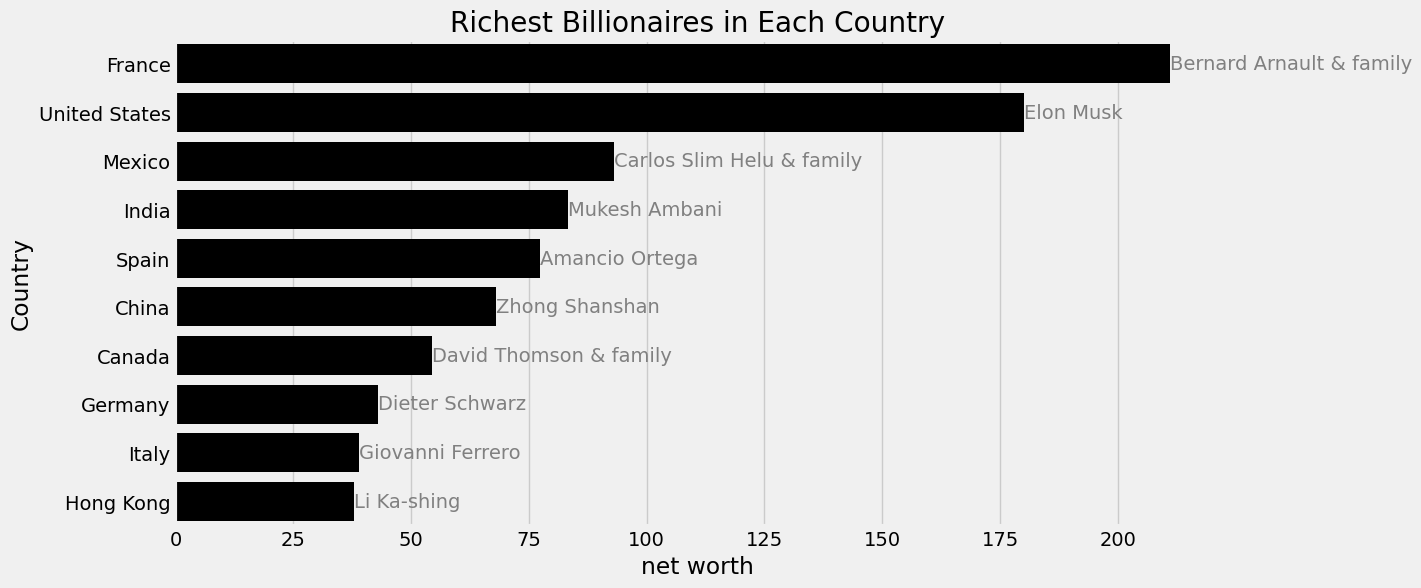

In [37]:
plt.figure(figsize=(12,6))

richest_billionaires_in_each_country = richest_billionaires_in_each_country.head(10)

ax = sns.barplot(data=richest_billionaires_in_each_country, y='country', x='net_worth', color='black')

for i, row in enumerate(richest_billionaires_in_each_country.iterrows()):
    ax.text(row[1]['net_worth'], i, row[1]['name'], color='gray', va='center')

plt.xlabel('net worth')
plt.ylabel('Country')
plt.title('Richest Billionaires in Each Country')
plt.show()

### What is the distribution of billionaires' ages in the dataset?

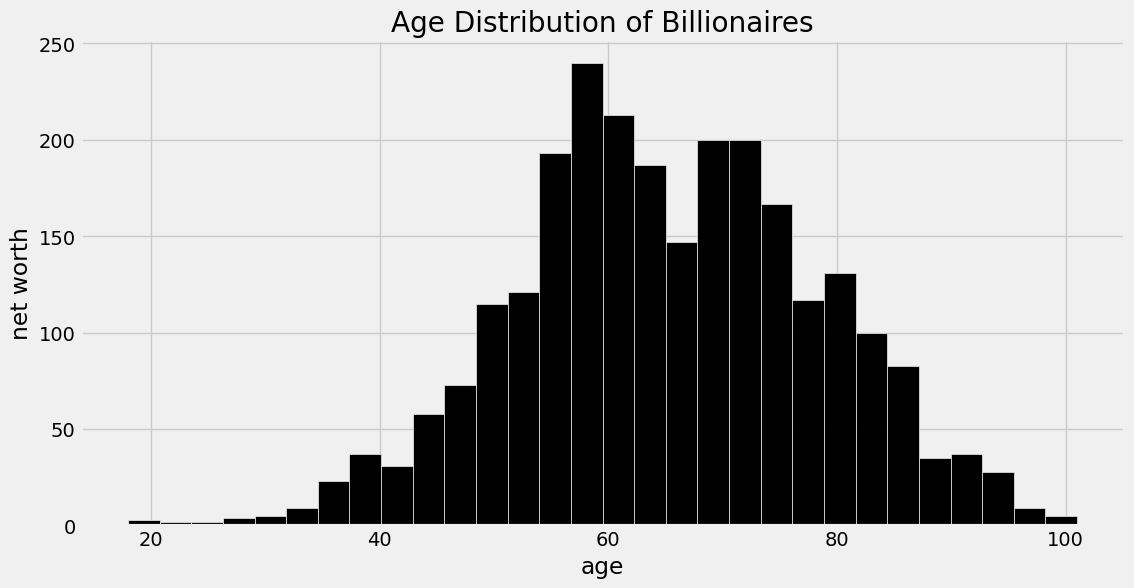

In [38]:
plt.figure(figsize=(12,6))

sns.histplot(data=df, x='age', color='Black', alpha=1)

plt.xlabel('age')
plt.ylabel('net worth')
plt.title('Age Distribution of Billionaires')
plt.show()

### Who is the youngest and the oldest billionaire in the list?

### Oldest Billionaire

In [39]:
filter_age = df[df['age'].notnull()]

billionaires_age = filter_age[['name','country', 'age']].sort_values(by='age', ascending=False)
billionaires_age.head(1)

,name,country,age
2143,George Joseph,United States,101.0


### Youngest Billionaire

In [40]:
billionaires_age = filter_age[['name','country', 'age']].sort_values(by='age')
billionaires_age.head(1)

,name,country,age
839,Clemente Del Vecchio,Italy,18.0


### Who are the youngest and the oldest billionaires from each country?

### Oldest billionaires from each country

In [41]:
filter_age = df[df['age'].notnull()]

oldest_billionaire = filter_age.sort_values(by='age', ascending=False).groupby('country').head(1)
oldest_billionaire = oldest_billionaire.sort_values(by='age', ascending=False).head(10)
oldest_billionaire

,rank,name,net_worth,age,country,source,industry
2143,2133,George Joseph,1.3,101.0,United States,Insurance,Finance & Investments
2344,2259,Keshub Mahindra,1.2,99.0,India,Diversified,Diversified
145,146,Robert Kuok,11.8,99.0,Malaysia,"Palm oil, shipping, property",Diversified
2634,2540,Ana Maria Brescia Cafferata,1.0,98.0,Peru,"Mining, banking",Diversified
2057,2020,Bernard Lewis & family,1.4,97.0,United Kingdom,Fashion retailer,Fashion & Retail
2130,2020,Nobutoshi Shimamura,1.4,97.0,Japan,Retail,Fashion & Retail
1965,1905,Stephen Jarislowsky,1.5,97.0,Canada,Money management,Finance & Investments
409,405,Stef Wertheimer & family,6.3,96.0,Israel,Metalworking tools,Manufacturing
1577,1575,Shi Wen-long,1.9,95.0,Taiwan,Plastics,Manufacturing
46,47,Lee Shau Kee,29.5,95.0,Hong Kong,Real estate,Real Estate


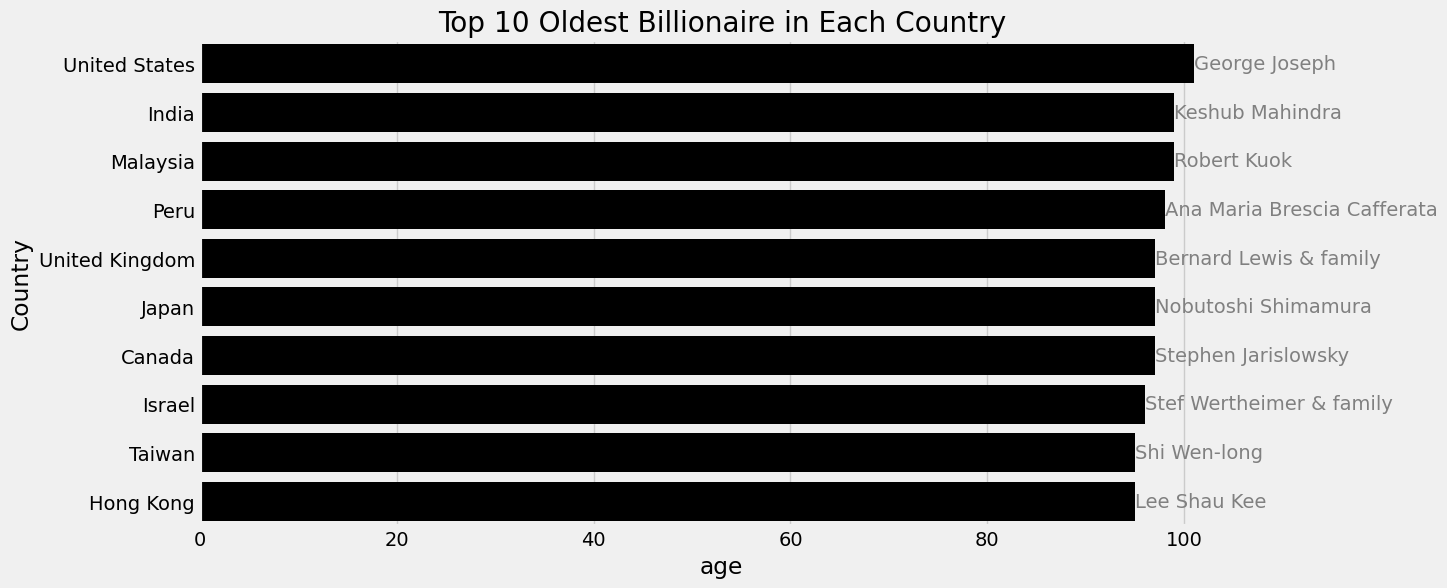

In [42]:
plt.figure(figsize=(12,6))

ax = sns.barplot(data=oldest_billionaire, y='country', x='age', color='black')

for i, row in enumerate(oldest_billionaire.iterrows()):
    ax.text(row[1]['age'], i, row[1]['name'], color='gray', va='center')

plt.xlabel('age')
plt.ylabel('Country')
plt.title('Top 10 Oldest Billionaire in Each Country')
plt.show()

### Youngest billionaires from each country

In [43]:
youngest_billionaire = filter_age.sort_values(by='age').groupby('country').head(1)
youngest_billionaire = youngest_billionaire.sort_values(by='age').head(10)
youngest_billionaire

,rank,name,net_worth,age,country,source,industry
839,818,Clemente Del Vecchio,3.5,18.0,Italy,Eyeglases,Fashion & Retail
1754,1725,Kim Jung-youn,1.7,19.0,South Korea,Online gaming,Media & Entertainment
1312,1312,Kevin David Lehmann,2.3,20.0,Germany,Drugstores,Fashion & Retail
1939,1905,Alexandra Andresen,1.5,26.0,Norway,Investments,Diversified
2092,2020,Wang Zelong,1.4,26.0,China,Chemicals,Metals & Mining
2530,2405,Ryan Breslow,1.1,28.0,United States,E-commerce software,Technology
1557,1516,Michal Strnad,2.0,30.0,Czech Republic,Defense Contracting,Manufacturing
36,37,Mark Mateschitz,34.7,30.0,Austria,Red Bull,Food & Beverage
2271,2259,Ben Francis,1.2,30.0,United Kingdom,Fitness clothing,Fashion & Retail
1152,1104,Jonathan Kwok,2.7,31.0,Hong Kong,Real Estate,Real Estate


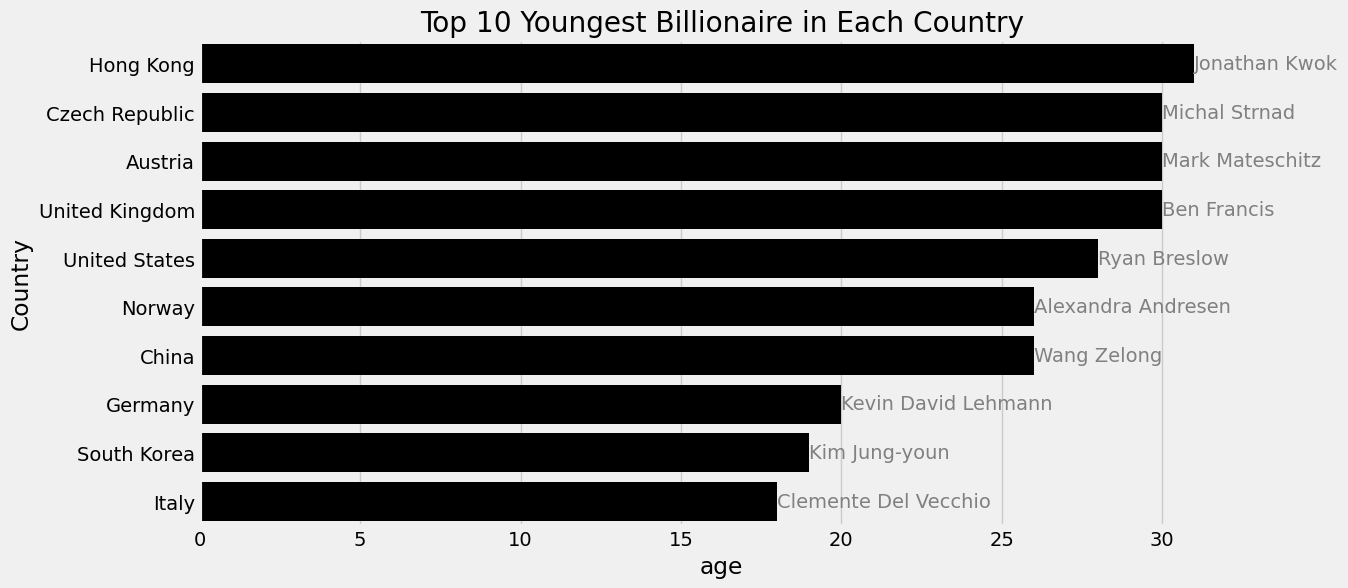

In [44]:
plt.figure(figsize=(12,6))

youngest_billionaire = youngest_billionaire.sort_values(by='age', ascending=False)

ax = sns.barplot(data=youngest_billionaire, y='country', x='age', color='black')

for i, row in enumerate(youngest_billionaire.iterrows()):
    ax.text(row[1]['age'], i, row[1]['name'], color='gray', va='center')

plt.xlabel('age')
plt.ylabel('Country')
plt.title('Top 10 Youngest Billionaire in Each Country')
plt.show()

### Among the countries with the highest number of billionaires, who is the oldest billionaires?

In [45]:
most_billionaires = filter_age['country'].value_counts().head(10).index

this_oldest_billionaire = df[df['country'].isin(most_billionaires)]

this_oldest_billionaire = this_oldest_billionaire.sort_values(by='age', ascending=False).groupby('country').head(1)
this_oldest_billionaire

,rank,name,net_worth,age,country,source,industry
2143,2133,George Joseph,1.3,101.0,United States,Insurance,Finance & Investments
2344,2259,Keshub Mahindra,1.2,99.0,India,Diversified,Diversified
2057,2020,Bernard Lewis & family,1.4,97.0,United Kingdom,Fashion retailer,Fashion & Retail
1965,1905,Stephen Jarislowsky,1.5,97.0,Canada,Money management,Finance & Investments
46,47,Lee Shau Kee,29.5,95.0,Hong Kong,Real estate,Real Estate
1042,1027,Erwin Franz Mueller,2.9,90.0,Germany,Drugstores,Fashion & Retail
2022,2020,Lucia Maggi & family,1.4,90.0,Brazil,Agribusiness,Diversified
1253,1217,Wu Zhigang & family,2.5,88.0,China,Bakery chain,Food & Beverage
2015,1905,Romano Minozzi,1.5,88.0,Italy,"Utilities, diversified",Diversified
1751,1725,Vladimir Yevtushenkov,1.7,74.0,Russia,"Telecom, investments",Telecom


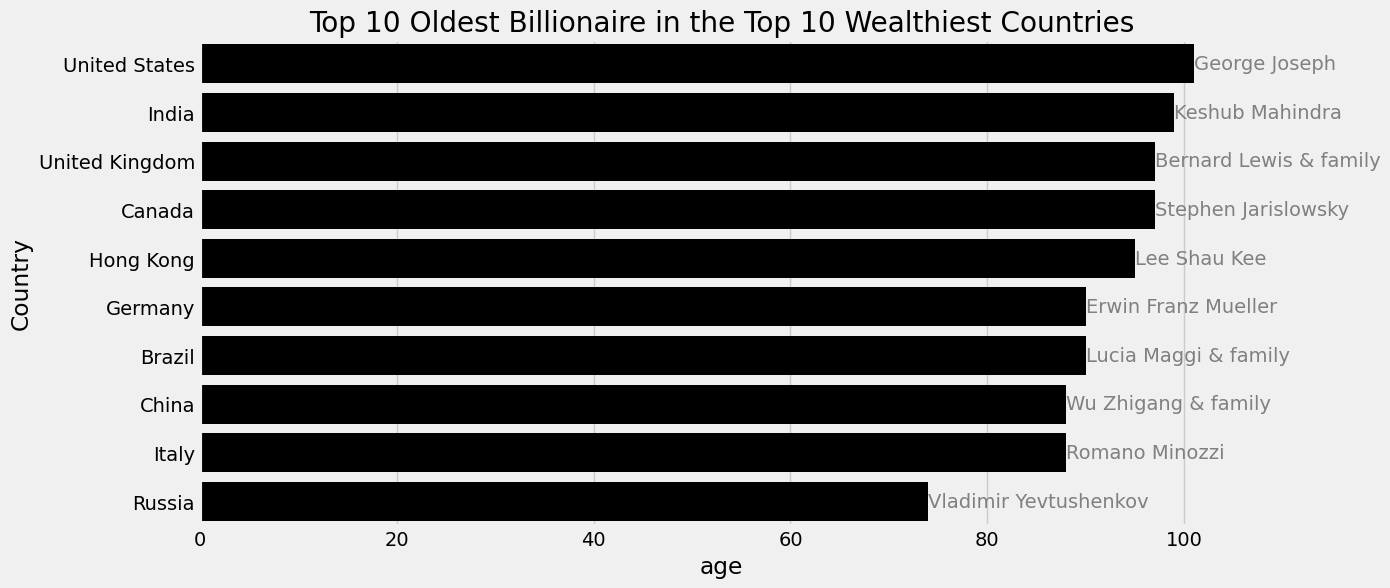

In [46]:
plt.figure(figsize=(12,6))

ax = sns.barplot(data=this_oldest_billionaire, y='country', x='age', color='black')

for i, row in enumerate(this_oldest_billionaire.iterrows()):
    ax.text(row[1]['age'], i, row[1]['name'], color='gray', va='center')

plt.xlabel('age')
plt.ylabel('Country')
plt.title('Top 10 Oldest Billionaire in the Top 10 Wealthiest Countries')
plt.show()

### Among the countries with the highest number of billionaires, who is the youngest billionaires?

In [47]:
most_billionaires = filter_age['country'].value_counts().head(10).index

this_youngest_billionaire = df[df['country'].isin(most_billionaires)]

this_youngest_billionaire = this_youngest_billionaire.sort_values(by='age').groupby('country').head(1)
this_youngest_billionaire

,rank,name,net_worth,age,country,source,industry
839,818,Clemente Del Vecchio,3.5,18.0,Italy,Eyeglases,Fashion & Retail
1312,1312,Kevin David Lehmann,2.3,20.0,Germany,Drugstores,Fashion & Retail
2092,2020,Wang Zelong,1.4,26.0,China,Chemicals,Metals & Mining
2530,2405,Ryan Breslow,1.1,28.0,United States,E-commerce software,Technology
2271,2259,Ben Francis,1.2,30.0,United Kingdom,Fitness clothing,Fashion & Retail
1152,1104,Jonathan Kwok,2.7,31.0,Hong Kong,Real Estate,Real Estate
2461,2405,Said Gutseriev,1.1,34.0,Russia,"Retail, investments",Energy
2561,2540,Apoorva Mehta,1.0,36.0,Canada,Grocery delivery service,Technology
2415,2405,Nikhil Kamath,1.1,36.0,India,Financial services,Finance & Investments
2108,2020,Anne Werninghaus,1.4,37.0,Brazil,Industrial machinery,Manufacturing


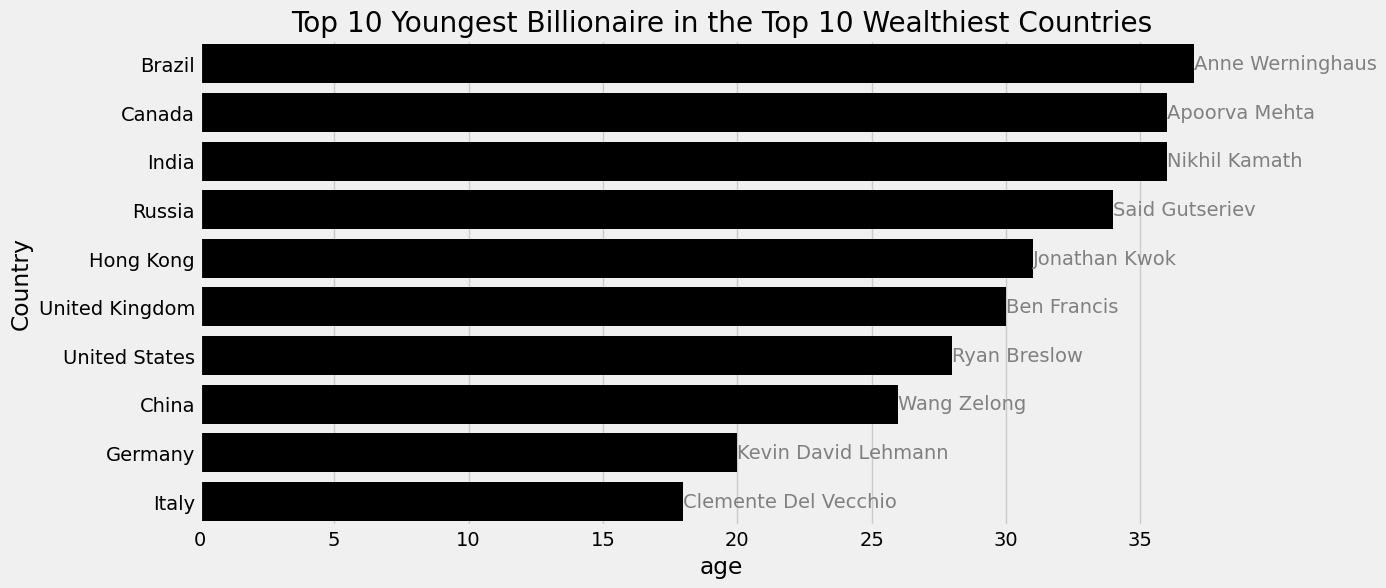

In [48]:
plt.figure(figsize=(12,6))

this_youngest_billionaire = this_youngest_billionaire.sort_values(by='age', ascending=False)

ax = sns.barplot(data=this_youngest_billionaire, y='country', x='age', color='black')

for i, row in enumerate(this_youngest_billionaire.iterrows()):
    ax.text(row[1]['age'], i, row[1]['name'], color='gray', va='center')

plt.xlabel('age')
plt.ylabel('Country')
plt.title('Top 10 Youngest Billionaire in the Top 10 Wealthiest Countries')
plt.show()

### What is the average net worth across different age groups?

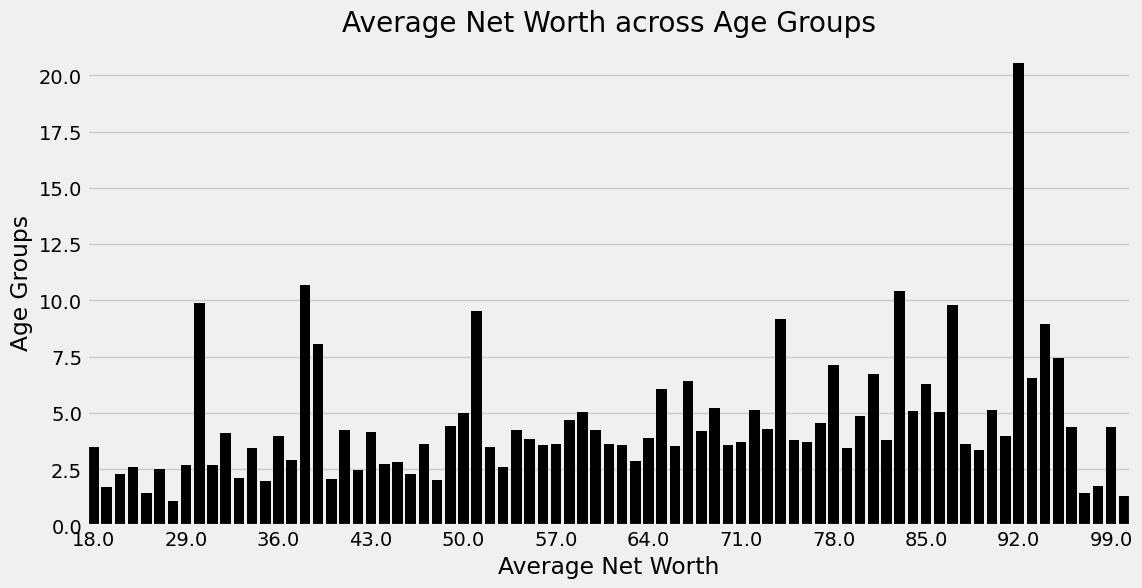

In [49]:
plt.figure(figsize=(12, 6))

average_net_worth = df.groupby('age')['net_worth'].mean().reset_index()

sns.barplot(data=average_net_worth, x='age', y='net_worth', color='Black')

# Set the plot labels and title
plt.xlabel('Average Net Worth')
plt.ylabel('Age Groups')
plt.title('Average Net Worth across Age Groups')

# Customize x-axis tick labels
num_ticks = 10  # Specify the desired number of tick labels
step = max(1, len(average_net_worth) // num_ticks)
plt.xticks(range(0, len(average_net_worth), step), average_net_worth['age'][::step])

plt.show()

### What is the count of unique industries?

In [50]:
print('Number of unique industries in the forbes dataset:')
print('-----------------------------------------------------------------')

diff_industries = df['industry'].nunique()
diff_industries

Number of unique industries in the forbes dataset:
-----------------------------------------------------------------


18

### Which industries have the highest number of billionaires?

In [51]:
industry_billionaires_count = df['industry'].value_counts()
industry_billionaires_count

industry
Finance & Investments         372
Manufacturing                 324
Technology                    314
Fashion & Retail              266
Food & Beverage               212
Healthcare                    201
Real Estate                   193
Diversified                   187
Energy                        100
Media & Entertainment          91
Metals & Mining                74
Automotive                     73
Service                        53
Construction & Engineering     45
Logistics                      40
Sports                         39
Telecom                        31
Gambling & Casinos             25
Name: count, dtype: int64

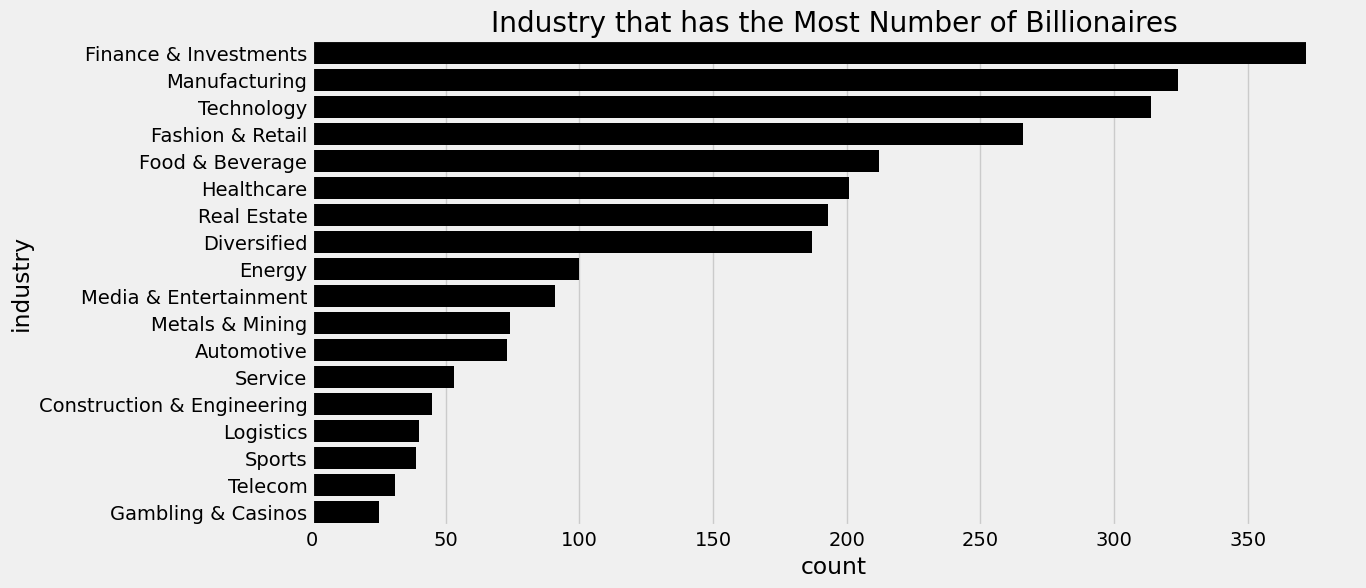

In [52]:
plt.figure(figsize=(12,6))

sns.barplot(x=industry_billionaires_count.values, y=industry_billionaires_count.index, color='black')

plt.xlabel('count')
plt.ylabel('industry')
plt.title('Industry that has the Most Number of Billionaires')
plt.show()

### Which industry holds the highest amount of wealth?

In [53]:
industry_wealth = df.groupby('industry')['net_worth'].sum().sort_values(ascending=False)
industry_wealth

industry
Technology                    1877.9
Fashion & Retail              1698.8
Finance & Investments         1605.1
Manufacturing                 1019.0
Food & Beverage                957.2
Diversified                    905.2
Real Estate                    657.4
Healthcare                     643.2
Automotive                     525.3
Energy                         453.5
Metals & Mining                446.8
Media & Entertainment          427.5
Logistics                      239.5
Telecom                        203.5
Service                        173.4
Sports                         134.5
Gambling & Casinos             120.5
Construction & Engineering     118.5
Name: net_worth, dtype: float64

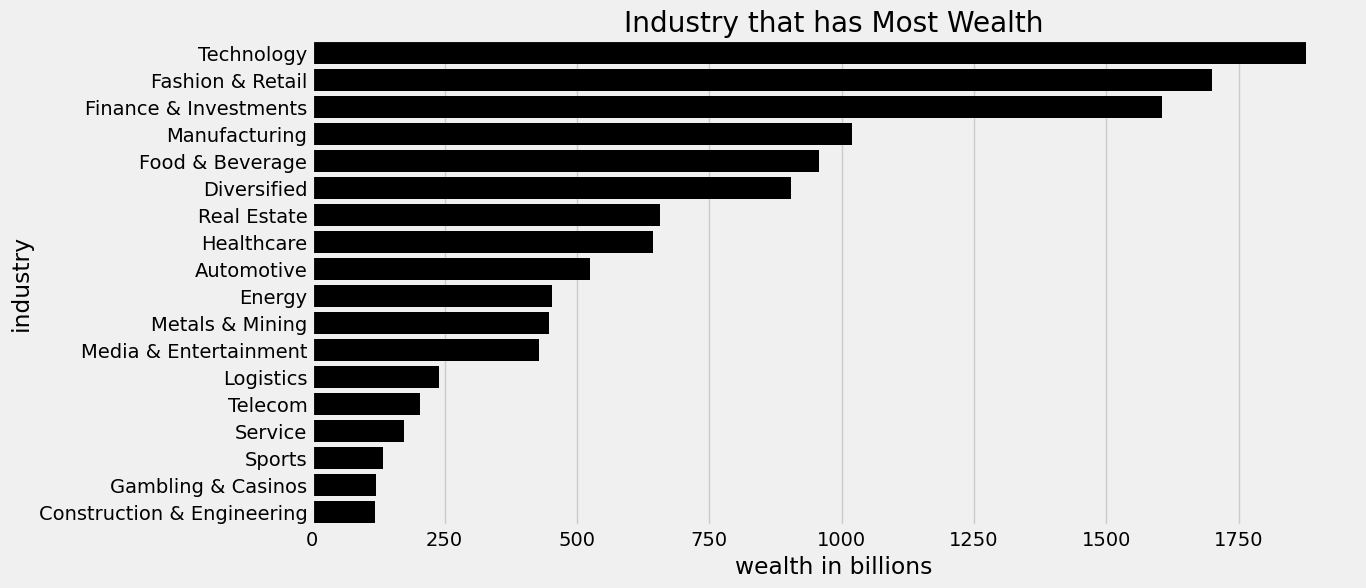

In [54]:
plt.figure(figsize=(12,6))

sns.barplot(x=industry_wealth.values, y=industry_wealth.index, color='black')

plt.xlabel('wealth in billions')
plt.ylabel('industry')
plt.title('Industry that has Most Wealth')
plt.show()

### Which industries are the most popular, among the countries with the highest wealth?

In [55]:
highest_wealth_countries = df.groupby('country')['net_worth'].sum().sort_values(ascending=False)
highest_wealth_countries

country
United States    4490.8
China            1668.3
India             674.8
France            590.0
Germany           585.4
                  ...  
Macau               1.3
Estonia             1.3
Armenia             1.2
Panama              1.0
Bangladesh          1.0
Name: net_worth, Length: 77, dtype: float64

In [56]:
wealthy_countries = highest_wealth_countries.head(10).index  

# Filter the DataFrame to include only the selected wealthy countries
filtered_df = df[df['country'].isin(wealthy_countries)]

country_popular_industries = filtered_df.groupby(['country', 'industry'])['net_worth'].sum().sort_values(ascending=False)
country_popular_industries = country_popular_industries.groupby(level=0).head(1).reset_index()
country_popular_industries

,country,industry,net_worth
0,United States,Technology,1167.1
1,France,Fashion & Retail,411.1
2,China,Manufacturing,354.5
3,India,Diversified,194.9
4,Germany,Fashion & Retail,178.4
5,Russia,Metals & Mining,152.6
6,Hong Kong,Real Estate,135.3
7,Italy,Fashion & Retail,89.4
8,Switzerland,Logistics,62.4
9,Canada,Media & Entertainment,57.4


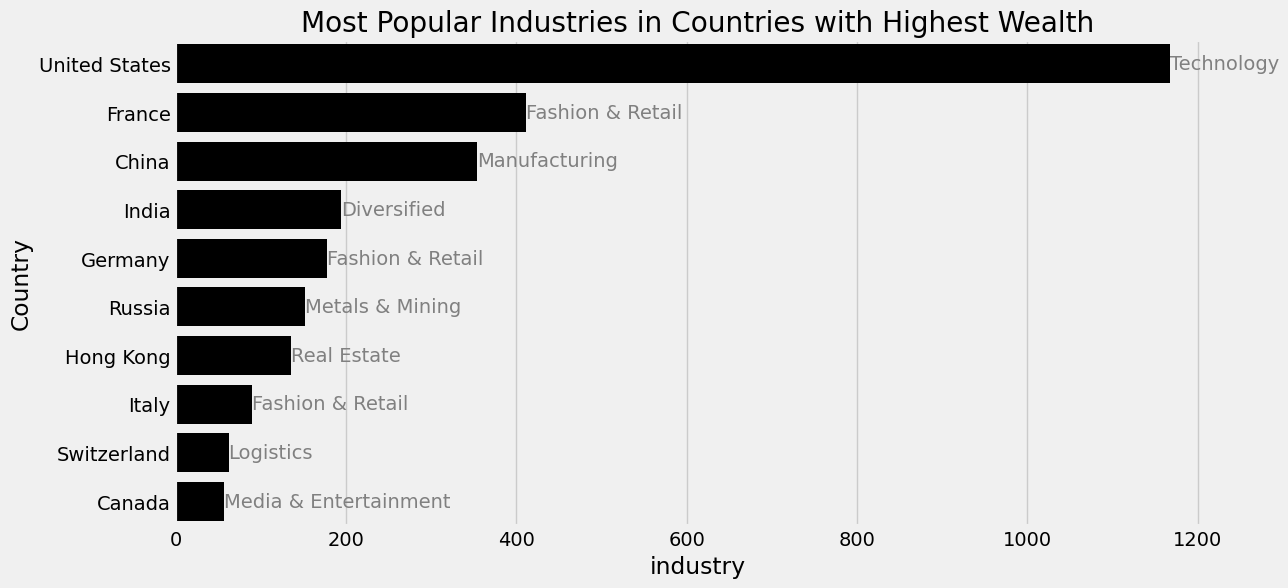

In [57]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=country_popular_industries, y='country', x='net_worth', color='Black')

for i, row in enumerate(country_popular_industries.iterrows()):
    ax.text(row[1]['net_worth'], i, row[1]['industry'], color='gray', va='center')

plt.xlabel('industry')
plt.ylabel('Country')
plt.title('Most Popular Industries in Countries with Highest Wealth')
plt.show()

### What is the share of industry wealth for the country with the highest wealth?

In [58]:
highest_wealth_countries = df.groupby('country')['net_worth'].sum().sort_values(ascending=False)
highest_wealth_countries = highest_wealth_countries.head(1).index 

filter_df = df[df['country'].isin(highest_wealth_countries)]
filter_df

,rank,name,net_worth,age,country,source,industry
1,2,Elon Musk,180.0,51.0,United States,"Tesla, SpaceX",Automotive
2,3,Jeff Bezos,114.0,59.0,United States,Amazon,Technology
3,4,Larry Ellison,107.0,78.0,United States,Oracle,Technology
4,5,Warren Buffett,106.0,92.0,United States,Berkshire Hathaway,Finance & Investments
5,6,Bill Gates,104.0,67.0,United States,Microsoft,Technology
...,...,...,...,...,...,...,...
2607,2540,Tyler Perry,1.0,53.0,United States,"Movies, television",Media & Entertainment
2631,2540,George Sakellaris,1.0,76.0,United States,Energy services,Energy
2635,2540,Benoit Dageville,1.0,56.0,United States,Software,Technology
2641,2540,Jimmy Buffett,1.0,76.0,United States,"Entertainment, Margaritaville",Media & Entertainment


In [59]:
top_country_industry_share = filter_df.groupby('industry')['net_worth'].sum().sort_values(ascending=False)
top_country_industry_share

industry
Technology                    1167.1
Finance & Investments          988.8
Fashion & Retail               485.7
Food & Beverage                328.5
Media & Entertainment          254.8
Automotive                     227.0
Real Estate                    186.6
Diversified                    175.9
Energy                         158.1
Sports                         127.5
Healthcare                     113.6
Manufacturing                   93.1
Service                         67.1
Gambling & Casinos              49.5
Logistics                       22.3
Construction & Engineering      20.9
Telecom                         17.6
Metals & Mining                  6.7
Name: net_worth, dtype: float64

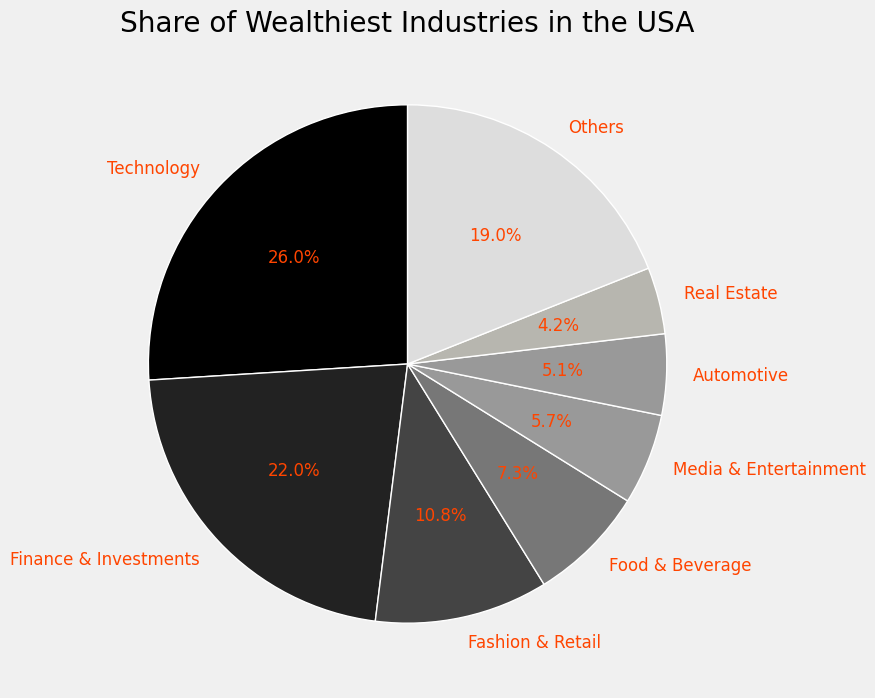

In [60]:
plt.figure(figsize=(8,8))

usa_top7_industry = top_country_industry_share[:7]
usa_other_industry = top_country_industry_share[7:].sum().round()

labels = list(usa_top7_industry.index) + ['Others']

values = list(usa_top7_industry.values) + [usa_other_industry]

colors = ['#000000', '#222222', '#444444', '#777777', '#999999', '#999999', '#b7b6af', '#dddddd'] 

wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}
textprops = {'color': 'Orangered', 'size':12}

plt.pie(values, labels=labels,colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops, textprops=textprops)

plt.title("Share of Wealthiest Industries in the USA")
plt.show()

### How does the net worth of billionaires vary across different industries? 

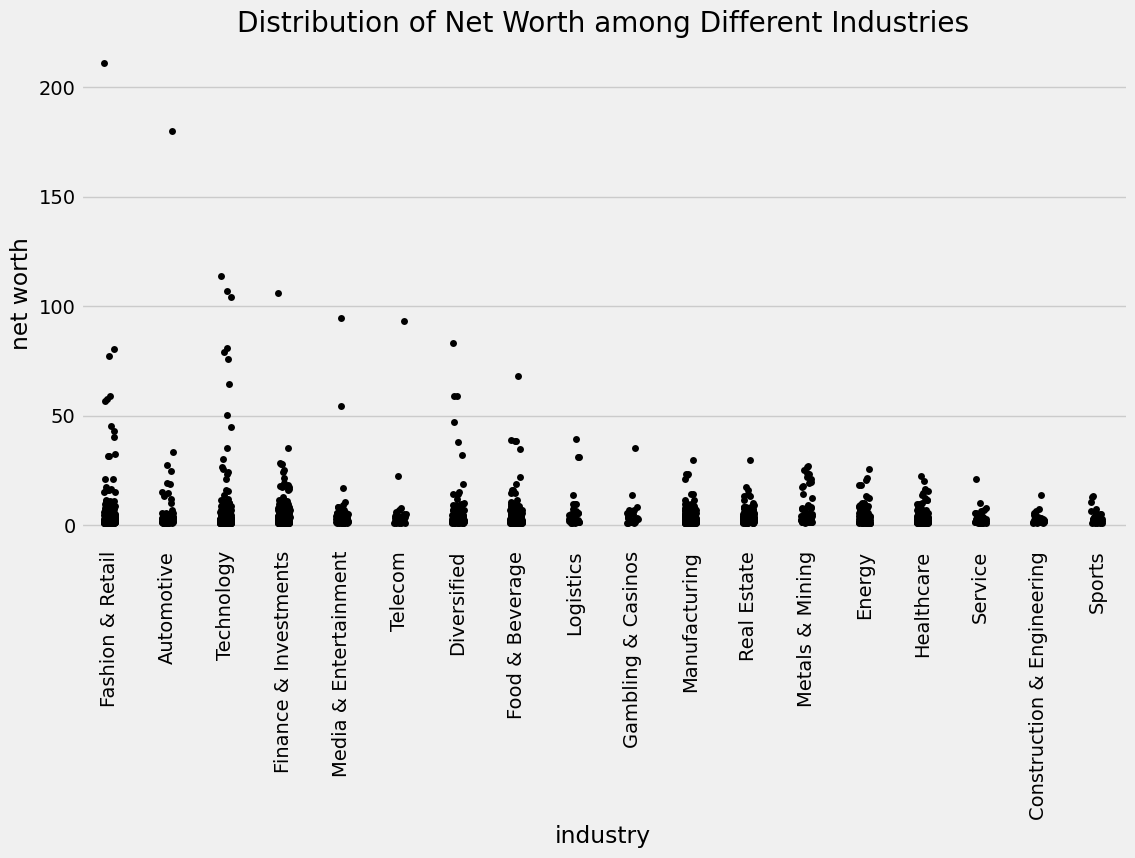

In [61]:
sns.catplot(data=df, x='industry', y='net_worth',  height=6, aspect=2, color='Black')

plt.xlabel('industry')
plt.ylabel('net worth')
plt.title('Distribution of Net Worth among Different Industries')
plt.xticks(rotation=90)
plt.show()

### Who are the youngest and the oldest billionaire in each industry?

### Youngest billionaire in each industry?

In [62]:
industry_youngest_billionaire = df.sort_values(by='age').groupby('industry').head(1)
industry_youngest_billionaire

,rank,name,net_worth,age,country,source,industry
839,818,Clemente Del Vecchio,3.5,18.0,Italy,Eyeglases,Fashion & Retail
1754,1725,Kim Jung-youn,1.7,19.0,South Korea,Online gaming,Media & Entertainment
1939,1905,Alexandra Andresen,1.5,26.0,Norway,Investments,Diversified
2092,2020,Wang Zelong,1.4,26.0,China,Chemicals,Metals & Mining
2530,2405,Ryan Breslow,1.1,28.0,United States,E-commerce software,Technology
1146,1104,Gustav Magnar Witzoe,2.7,29.0,Norway,Fish farming,Food & Beverage
1557,1516,Michal Strnad,2.0,30.0,Czech Republic,Defense Contracting,Manufacturing
1152,1104,Jonathan Kwok,2.7,31.0,Hong Kong,Real Estate,Real Estate
2627,2540,Ludwig Theodor Braun,1.0,33.0,Germany,Medical technology,Healthcare
2461,2405,Said Gutseriev,1.1,34.0,Russia,"Retail, investments",Energy


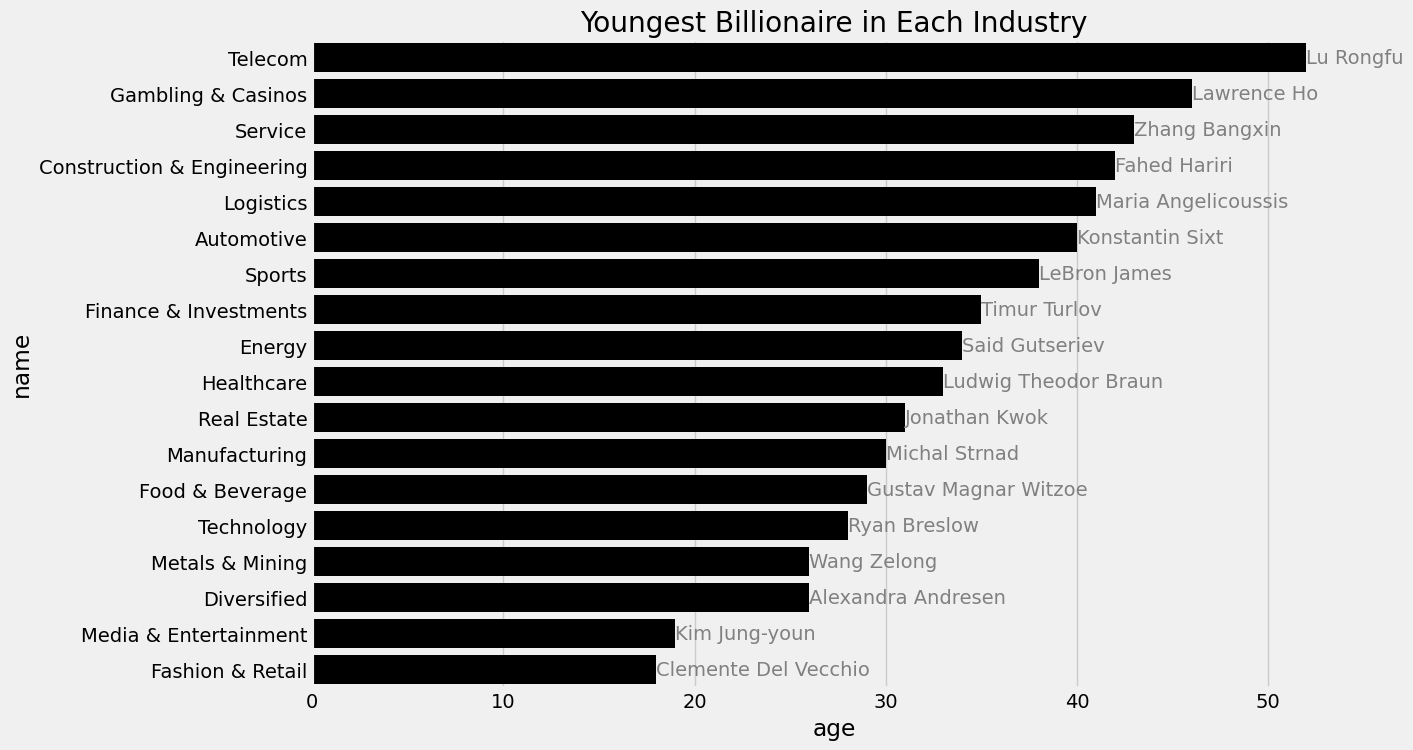

In [63]:
plt.figure(figsize=(12,8))

industry_youngest_billionaire = industry_youngest_billionaire.sort_values(by='age', ascending=False)

ax = sns.barplot(data=industry_youngest_billionaire, y='industry', x='age', color='black')

for i, row in enumerate(industry_youngest_billionaire.iterrows()):
    ax.text(row[1]['age'], i, row[1]['name'], color='gray', va='center')

plt.xlabel('age')
plt.ylabel('name')
plt.title('Youngest Billionaire in Each Industry')
plt.show()

### Oldest billionaire in each industry?

In [64]:
industry_oldest_billionaire = df.sort_values(by='age', ascending=False).groupby('industry').head(1)
industry_oldest_billionaire

,rank,name,net_worth,age,country,source,industry
2143,2133,George Joseph,1.3,101.0,United States,Insurance,Finance & Investments
145,146,Robert Kuok,11.8,99.0,Malaysia,"Palm oil, shipping, property",Diversified
1341,1312,David Murdock,2.3,99.0,United States,"Dole, real estate",Food & Beverage
2057,2020,Bernard Lewis & family,1.4,97.0,United Kingdom,Fashion retailer,Fashion & Retail
2047,2020,John Farber,1.4,97.0,United States,Chemicals,Manufacturing
1411,1368,Alice Schwartz,2.2,96.0,United States,Biotech,Healthcare
608,591,Charles Dolan & family,4.6,96.0,United States,Cable television,Media & Entertainment
1169,1164,Sergio Mantegazza,2.6,95.0,Switzerland,Travel,Service
46,47,Lee Shau Kee,29.5,95.0,Hong Kong,Real estate,Real Estate
358,352,Gordon Moore,6.8,94.0,United States,Intel,Technology


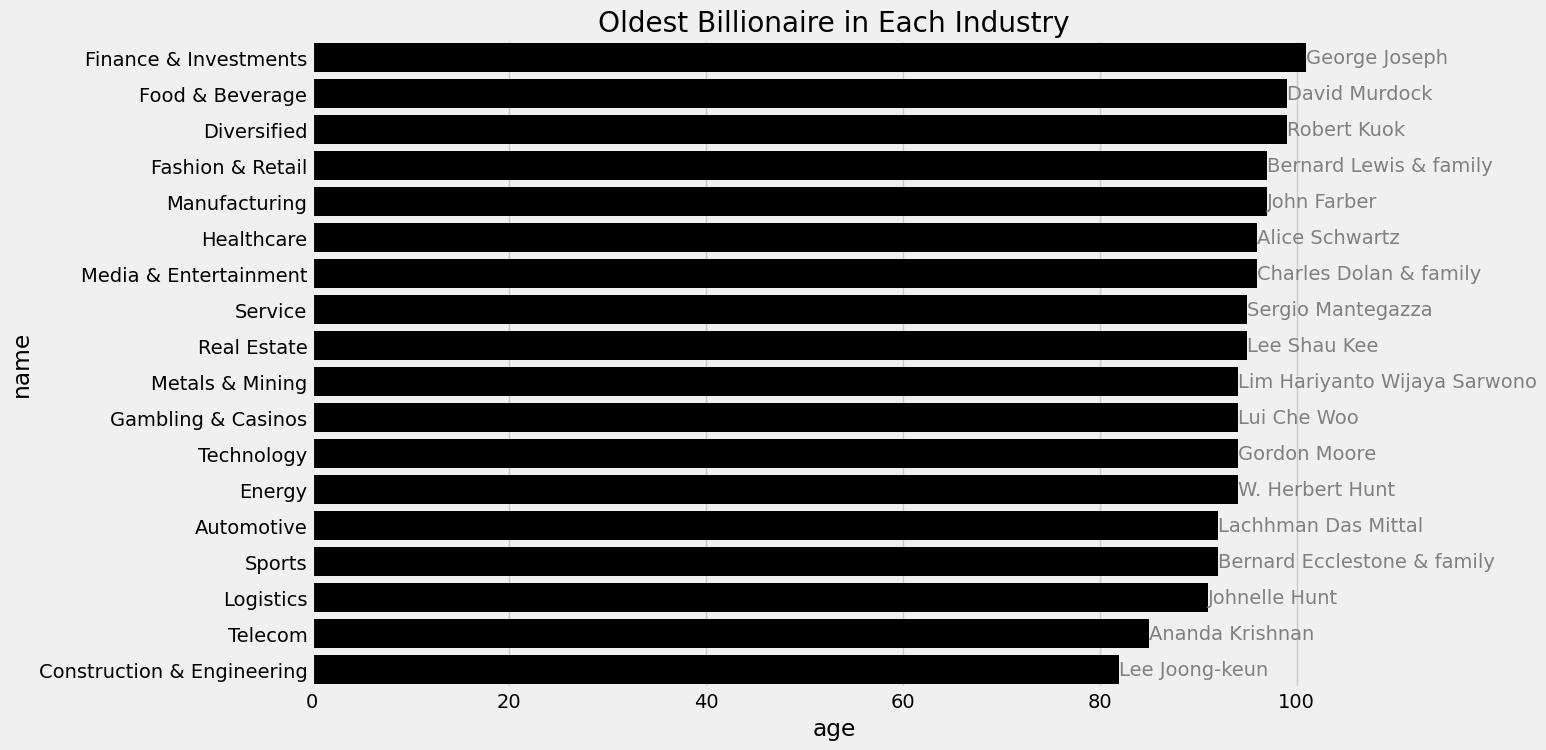

In [65]:
plt.figure(figsize=(12,8))

industry_oldest_billionaire = industry_oldest_billionaire.sort_values(by='age', ascending=False)

ax = sns.barplot(data=industry_oldest_billionaire, y='industry', x='age', color='black')

for i, row in enumerate(industry_oldest_billionaire.iterrows()):
    ax.text(row[1]['age'], i, row[1]['name'], color='gray', va='center')

plt.xlabel('age')
plt.ylabel('name')
plt.title('Oldest Billionaire in Each Industry')
plt.show()

### What is the average age of billionaires in each industries?

In [66]:
industry_avg_age = df.groupby('industry')['age'].mean().round(2).sort_values(ascending=False)
industry_avg_age

industry
Sports                        69.03
Diversified                   68.71
Gambling & Casinos            68.52
Logistics                     68.18
Real Estate                   68.12
Energy                        67.82
Service                       67.77
Fashion & Retail              66.78
Telecom                       66.68
Food & Beverage               66.64
Automotive                    66.14
Finance & Investments         65.47
Media & Entertainment         64.80
Manufacturing                 64.66
Healthcare                    64.66
Construction & Engineering    64.59
Metals & Mining               61.81
Technology                    57.32
Name: age, dtype: float64

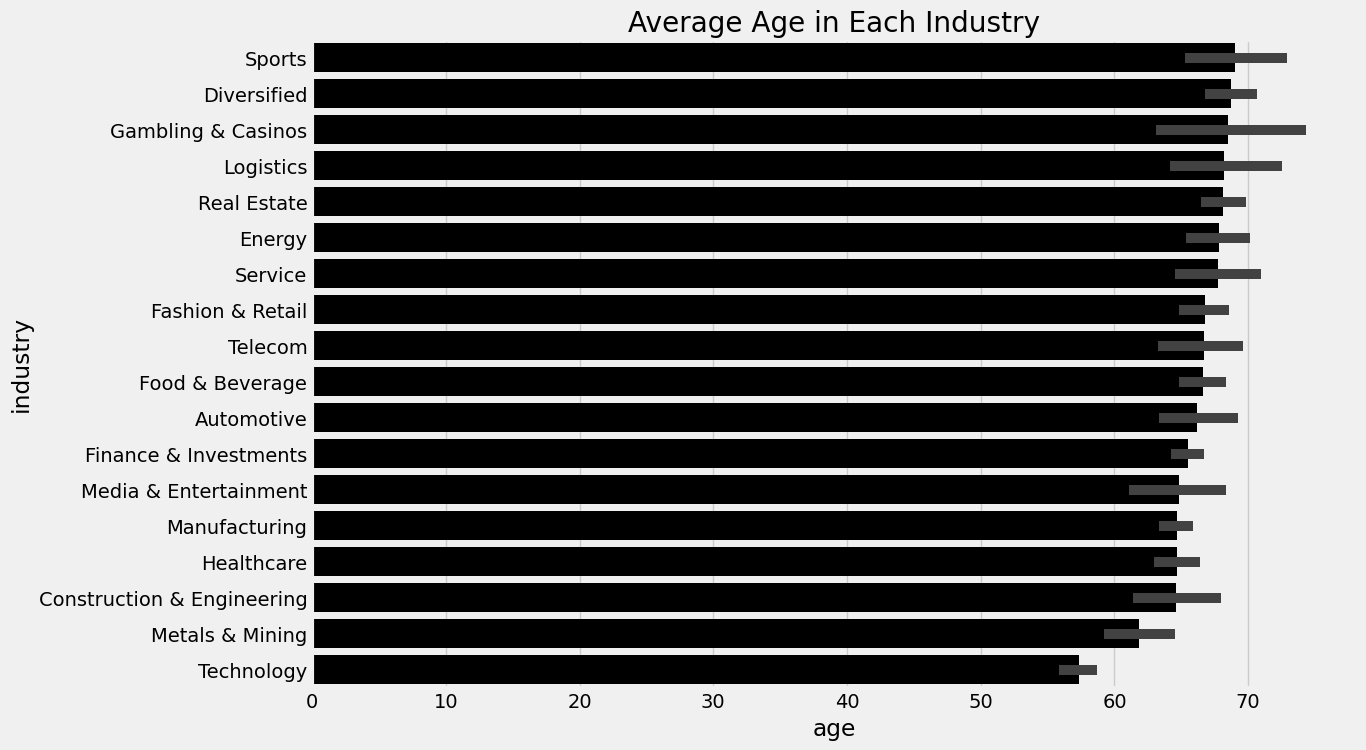

In [67]:
plt.figure(figsize=(12,8))

sns.barplot(data=df, x='age', y='industry', order=industry_avg_age.index, color='black')

plt.xlabel('age')
plt.ylabel('industry')
plt.title('Average Age in Each Industry')
plt.show()

### Who is the wealthiest billionaire in each industry?

In [68]:
wealthiest_in_each_industry = df.sort_values(by='net_worth', ascending=False).groupby('industry').head(1)
wealthiest_in_each_industry

,rank,name,net_worth,age,country,source,industry
0,1,Bernard Arnault & family,211.0,74.0,France,LVMH,Fashion & Retail
1,2,Elon Musk,180.0,51.0,United States,"Tesla, SpaceX",Automotive
2,3,Jeff Bezos,114.0,59.0,United States,Amazon,Technology
4,5,Warren Buffett,106.0,92.0,United States,Berkshire Hathaway,Finance & Investments
6,7,Michael Bloomberg,94.5,81.0,United States,Bloomberg LP,Media & Entertainment
7,8,Carlos Slim Helu & family,93.0,83.0,Mexico,Telecom,Telecom
8,9,Mukesh Ambani,83.4,65.0,India,Diversified,Diversified
14,15,Zhong Shanshan,68.0,68.0,China,"Beverages, pharmaceuticals",Food & Beverage
28,29,Klaus-Michael Kuehne,39.1,85.0,Germany,Shipping,Logistics
35,35,Miriam Adelson & family,35.0,77.0,United States,Casinos,Gambling & Casinos


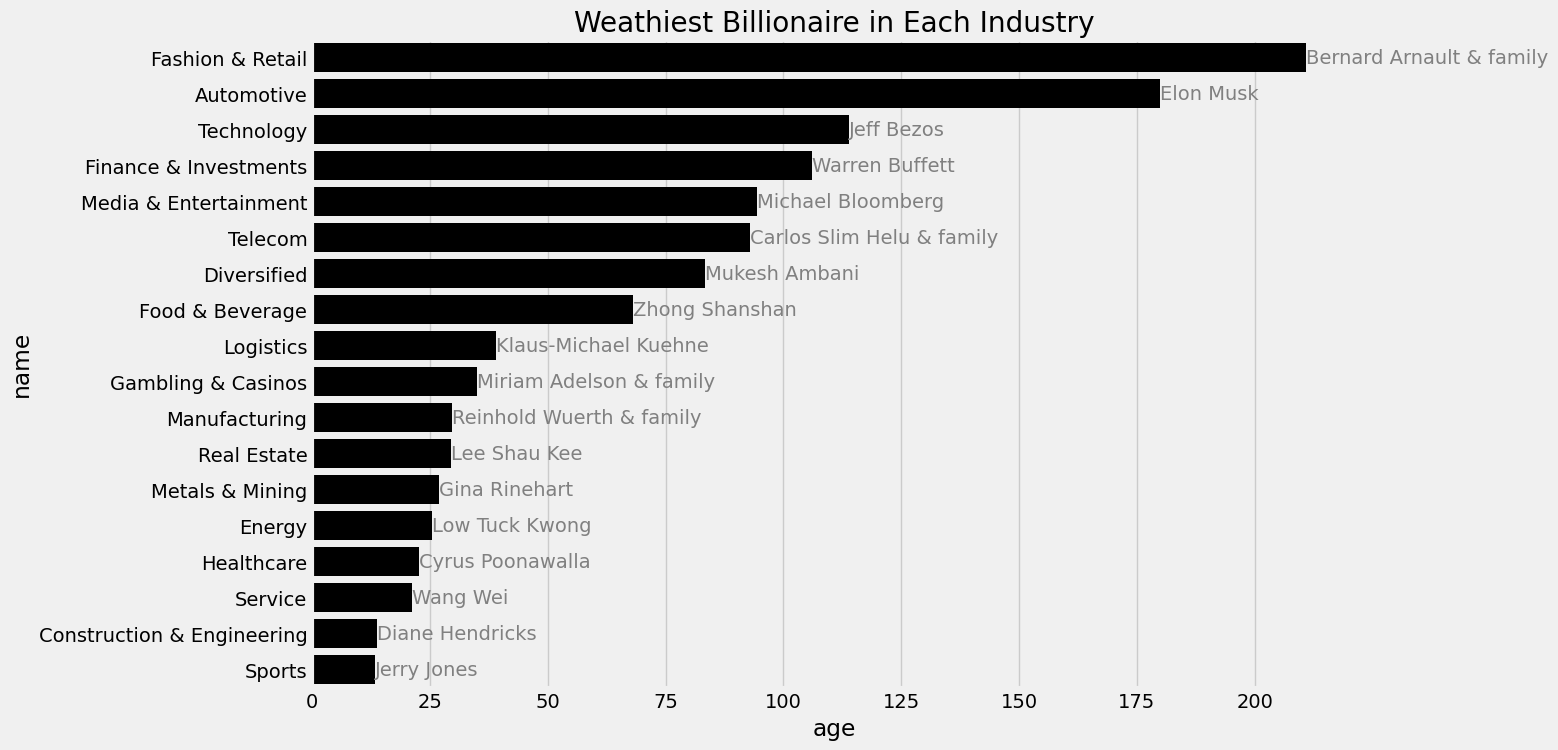

In [69]:
plt.figure(figsize=(12,8))

wealthiest_in_each_industry = wealthiest_in_each_industry.sort_values(by='net_worth', ascending=False)

ax = sns.barplot(data=wealthiest_in_each_industry, y='industry', x='net_worth', color='black')

for i, row in enumerate(wealthiest_in_each_industry.iterrows()):
    ax.text(row[1]['net_worth'], i, row[1]['name'], color='gray', va='center')

plt.xlabel('age')
plt.ylabel('name')
plt.title('Weathiest Billionaire in Each Industry')
plt.show()

### What is the share of industries among the top 5 wealthiest countries?

In [70]:
wealthiest_countries = df.groupby('country')['net_worth'].sum().sort_values(ascending=False).head(10)
wealthiest_countries

country
United States    4490.8
China            1668.3
India             674.8
France            590.0
Germany           585.4
Russia            471.3
Hong Kong         349.6
Canada            245.1
Italy             215.6
Switzerland       206.3
Name: net_worth, dtype: float64

### China

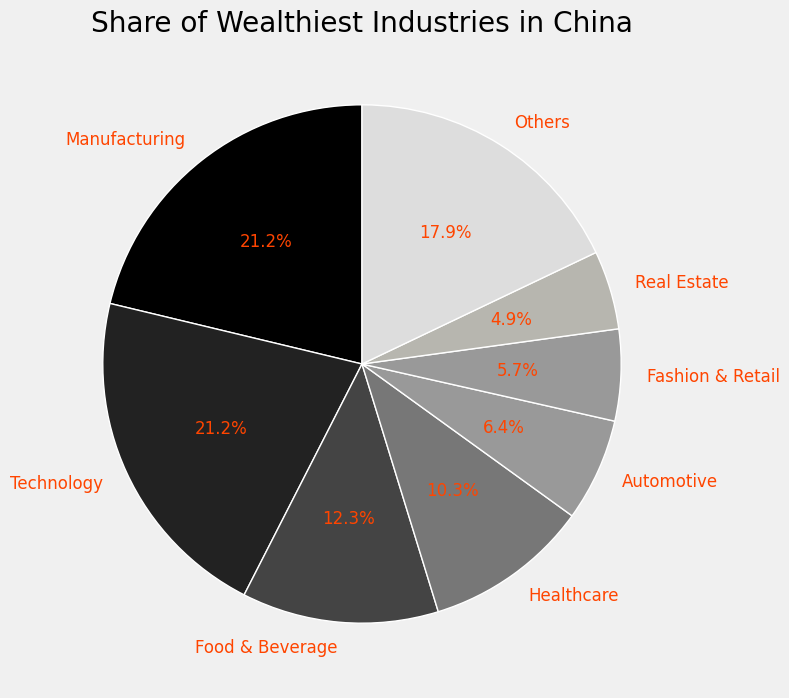

In [71]:
highest_wealth_countries = df.groupby('country')['net_worth'].sum().sort_values(ascending=False)
highest_wealth_countries = highest_wealth_countries.index 

filter_df = df[df['country']=='China']

top_country_industry_share = filter_df.groupby('industry')['net_worth'].sum().sort_values(ascending=False)
top_country_industry_share

plt.figure(figsize=(8,8))

top7_industry = top_country_industry_share[:7]
other_industry = top_country_industry_share[7:].sum().round()

labels = list(top7_industry.index) + ['Others']

values = list(top7_industry.values) + [other_industry]

colors = ['#000000', '#222222', '#444444', '#777777', '#999999', '#999999', '#b7b6af', '#dddddd'] 

wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}
textprops = {'color': 'Orangered', 'size':12}

plt.pie(values, labels=labels,colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops, textprops=textprops)

plt.title("Share of Wealthiest Industries in China")
plt.show()

### India

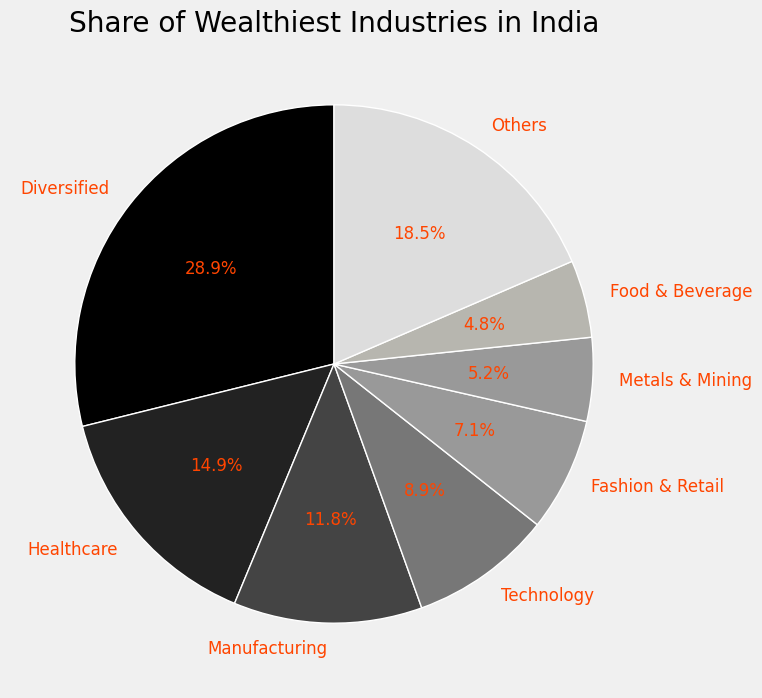

In [72]:
highest_wealth_countries = df.groupby('country')['net_worth'].sum().sort_values(ascending=False)
highest_wealth_countries = highest_wealth_countries.index 

filter_df = df[df['country']=='India']

top_country_industry_share = filter_df.groupby('industry')['net_worth'].sum().sort_values(ascending=False)
top_country_industry_share

plt.figure(figsize=(8,8))

top7_industry = top_country_industry_share[:7]
other_industry = top_country_industry_share[7:].sum().round()

labels = list(top7_industry.index) + ['Others']

values = list(top7_industry.values) + [other_industry]

colors = ['#000000', '#222222', '#444444', '#777777', '#999999', '#999999', '#b7b6af', '#dddddd'] 

wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}
textprops = {'color': 'Orangered', 'size':12}

plt.pie(values, labels=labels,colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops, textprops=textprops)

plt.title("Share of Wealthiest Industries in India")
plt.show()

### France

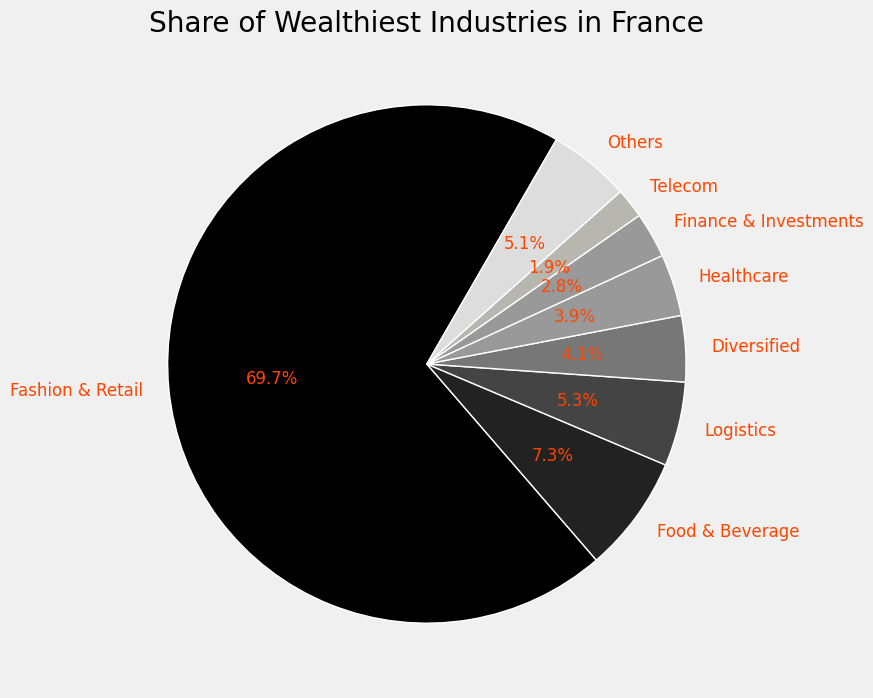

In [73]:
highest_wealth_countries = df.groupby('country')['net_worth'].sum().sort_values(ascending=False)
highest_wealth_countries = highest_wealth_countries.index 

filter_df = df[df['country']=='France']

top_country_industry_share = filter_df.groupby('industry')['net_worth'].sum().sort_values(ascending=False)
top_country_industry_share

plt.figure(figsize=(8,8))

top7_industry = top_country_industry_share[:7]
other_industry = top_country_industry_share[7:].sum().round()

labels = list(top7_industry.index) + ['Others']

values = list(top7_industry.values) + [other_industry]

colors = ['#000000', '#222222', '#444444', '#777777', '#999999', '#999999', '#b7b6af', '#dddddd'] 

wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}
textprops = {'color': 'Orangered', 'size':12}

plt.pie(values, labels=labels,colors=colors, autopct='%1.1f%%', startangle=60, wedgeprops=wedgeprops, textprops=textprops)

plt.title("Share of Wealthiest Industries in France")
plt.show()

### Germany

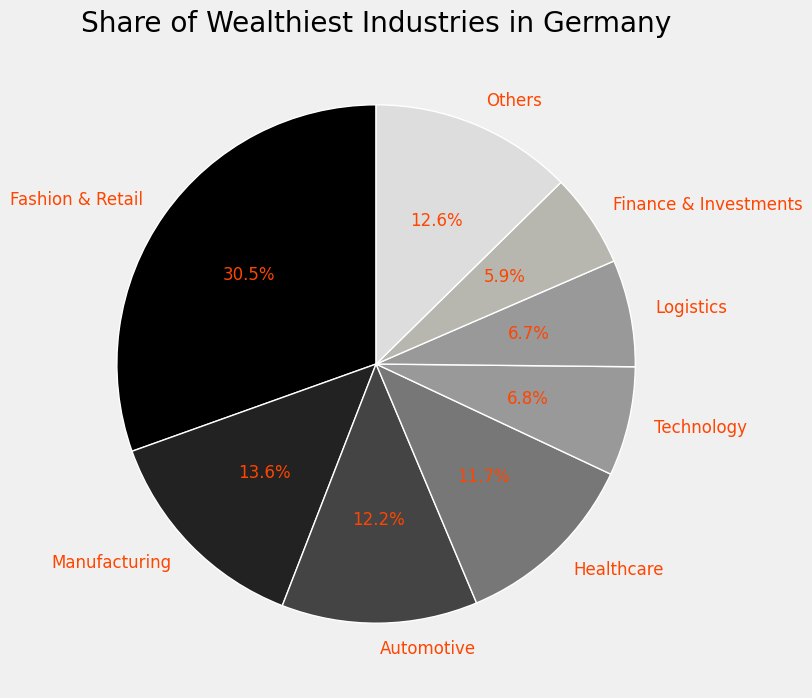

In [74]:
highest_wealth_countries = df.groupby('country')['net_worth'].sum().sort_values(ascending=False)
highest_wealth_countries = highest_wealth_countries.index 

filter_df = df[df['country']=='Germany']

top_country_industry_share = filter_df.groupby('industry')['net_worth'].sum().sort_values(ascending=False)
top_country_industry_share

plt.figure(figsize=(8,8))

top7_industry = top_country_industry_share[:7]
other_industry = top_country_industry_share[7:].sum().round()

labels = list(top7_industry.index) + ['Others']

values = list(top7_industry.values) + [other_industry]

colors = ['#000000', '#222222', '#444444', '#777777', '#999999', '#999999', '#b7b6af', '#dddddd'] 

wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}
textprops = {'color': 'Orangered', 'size':12}

plt.pie(values, labels=labels,colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops, textprops=textprops)

plt.title("Share of Wealthiest Industries in Germany")
plt.show()

### Russia

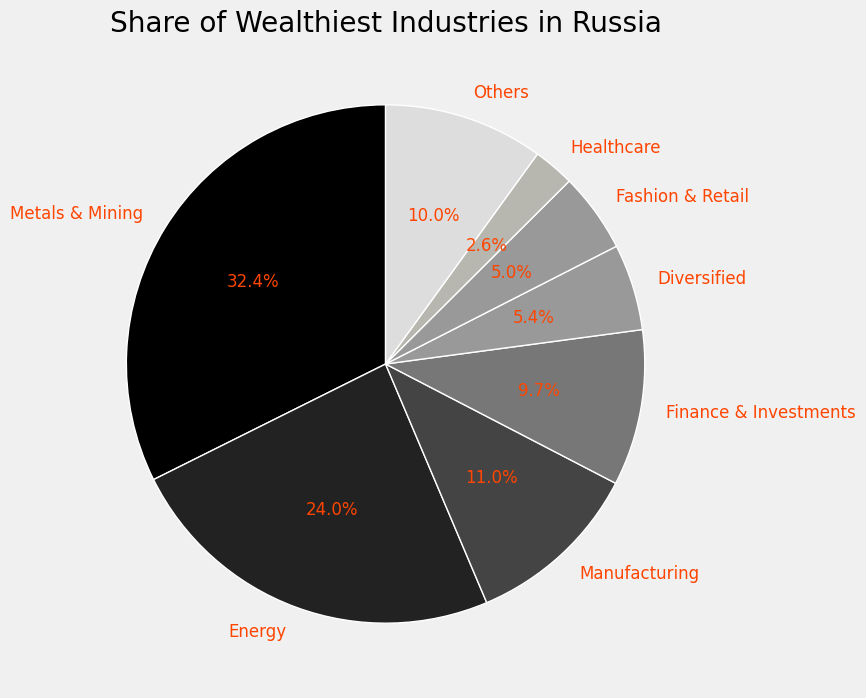

In [75]:
highest_wealth_countries = df.groupby('country')['net_worth'].sum().sort_values(ascending=False)
highest_wealth_countries = highest_wealth_countries.index 

filter_df = df[df['country']=='Russia']

top_country_industry_share = filter_df.groupby('industry')['net_worth'].sum().sort_values(ascending=False)
top_country_industry_share

plt.figure(figsize=(8,8))

top7_industry = top_country_industry_share[:7]
other_industry = top_country_industry_share[7:].sum().round()

labels = list(top7_industry.index) + ['Others']

values = list(top7_industry.values) + [other_industry]

colors = ['#000000', '#222222', '#444444', '#777777', '#999999', '#999999', '#b7b6af', '#dddddd'] 

wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}
textprops = {'color': 'Orangered', 'size':12}

plt.pie(values, labels=labels,colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops, textprops=textprops)

plt.title("Share of Wealthiest Industries in Russia")
plt.show()

### Hong Kong

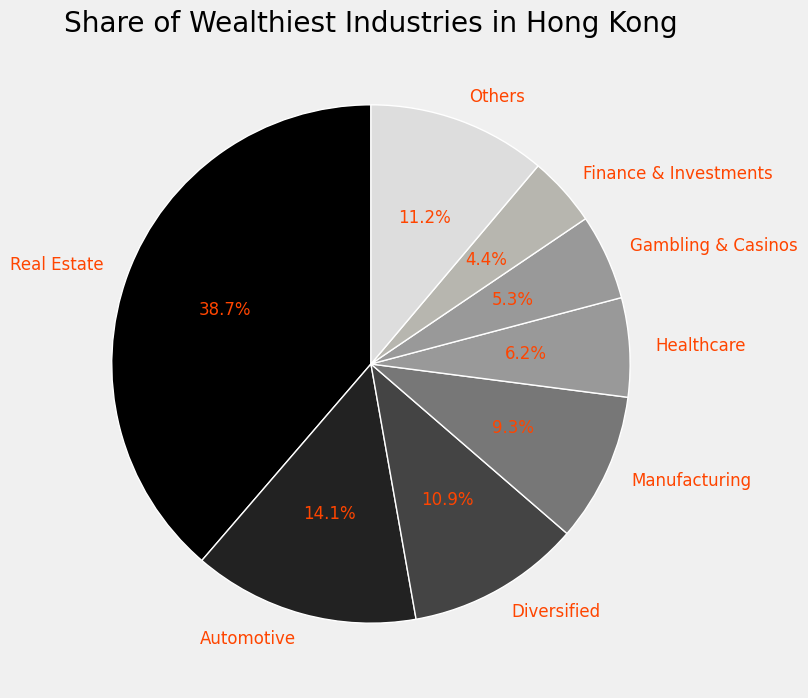

In [76]:
highest_wealth_countries = df.groupby('country')['net_worth'].sum().sort_values(ascending=False)
highest_wealth_countries = highest_wealth_countries.index 

filter_df = df[df['country']=='Hong Kong']

top_country_industry_share = filter_df.groupby('industry')['net_worth'].sum().sort_values(ascending=False)
top_country_industry_share

plt.figure(figsize=(8,8))

top7_industry = top_country_industry_share[:7]
other_industry = top_country_industry_share[7:].sum().round()

labels = list(top7_industry.index) + ['Others']

values = list(top7_industry.values) + [other_industry]

colors = ['#000000', '#222222', '#444444', '#777777', '#999999', '#999999', '#b7b6af', '#dddddd'] 

wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}
textprops = {'color': 'Orangered', 'size':12}

plt.pie(values, labels=labels,colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops, textprops=textprops)

plt.title("Share of Wealthiest Industries in Hong Kong")
plt.show()

### Canada

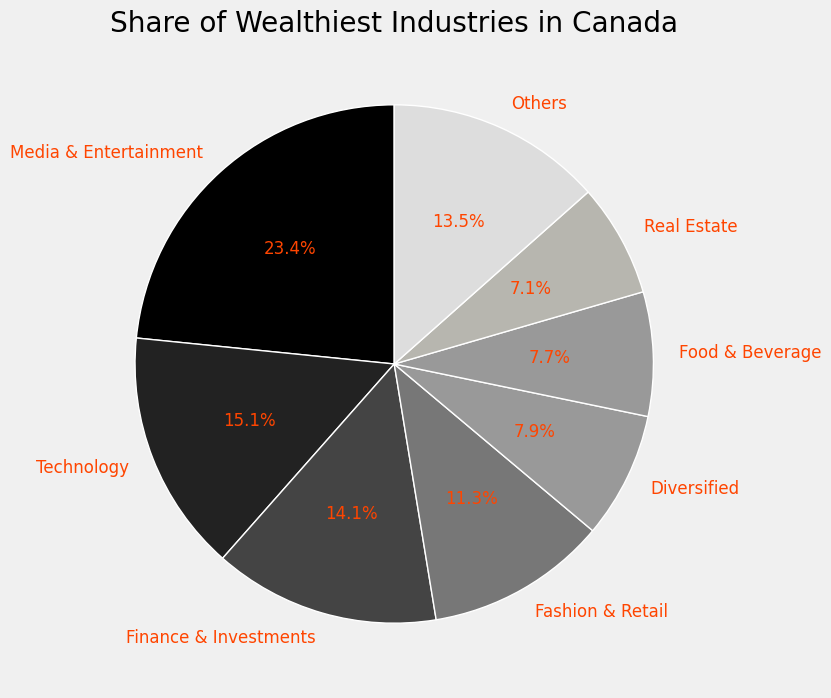

In [77]:
highest_wealth_countries = df.groupby('country')['net_worth'].sum().sort_values(ascending=False)
highest_wealth_countries = highest_wealth_countries.index 

filter_df = df[df['country']=='Canada']

top_country_industry_share = filter_df.groupby('industry')['net_worth'].sum().sort_values(ascending=False)
top_country_industry_share

plt.figure(figsize=(8,8))

top7_industry = top_country_industry_share[:7]
other_industry = top_country_industry_share[7:].sum().round()

labels = list(top7_industry.index) + ['Others']

values = list(top7_industry.values) + [other_industry]

colors = ['#000000', '#222222', '#444444', '#777777', '#999999', '#999999', '#b7b6af', '#dddddd'] 

wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}
textprops = {'color': 'Orangered', 'size':12}

plt.pie(values, labels=labels,colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops, textprops=textprops)

plt.title("Share of Wealthiest Industries in Canada")
plt.show()

### Italy

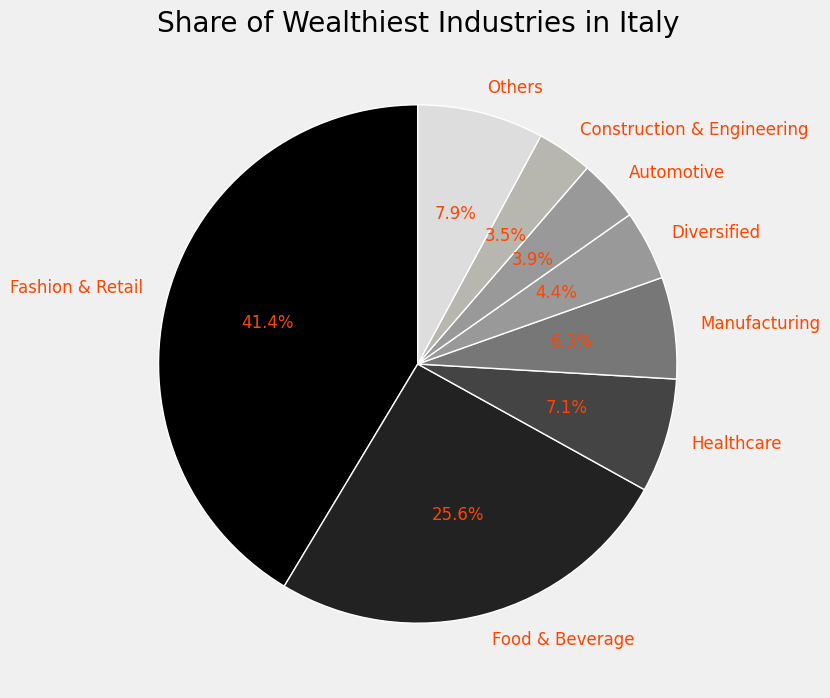

In [78]:
highest_wealth_countries = df.groupby('country')['net_worth'].sum().sort_values(ascending=False)
highest_wealth_countries = highest_wealth_countries.index 

filter_df = df[df['country']=='Italy']

top_country_industry_share = filter_df.groupby('industry')['net_worth'].sum().sort_values(ascending=False)
top_country_industry_share

plt.figure(figsize=(8,8))

top7_industry = top_country_industry_share[:7]
other_industry = top_country_industry_share[7:].sum().round()

labels = list(top7_industry.index) + ['Others']

values = list(top7_industry.values) + [other_industry]

colors = ['#000000', '#222222', '#444444', '#777777', '#999999', '#999999', '#b7b6af', '#dddddd'] 

wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}
textprops = {'color': 'Orangered', 'size':12}

plt.pie(values, labels=labels,colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops, textprops=textprops)

plt.title("Share of Wealthiest Industries in Italy")
plt.show()

### Switzerland

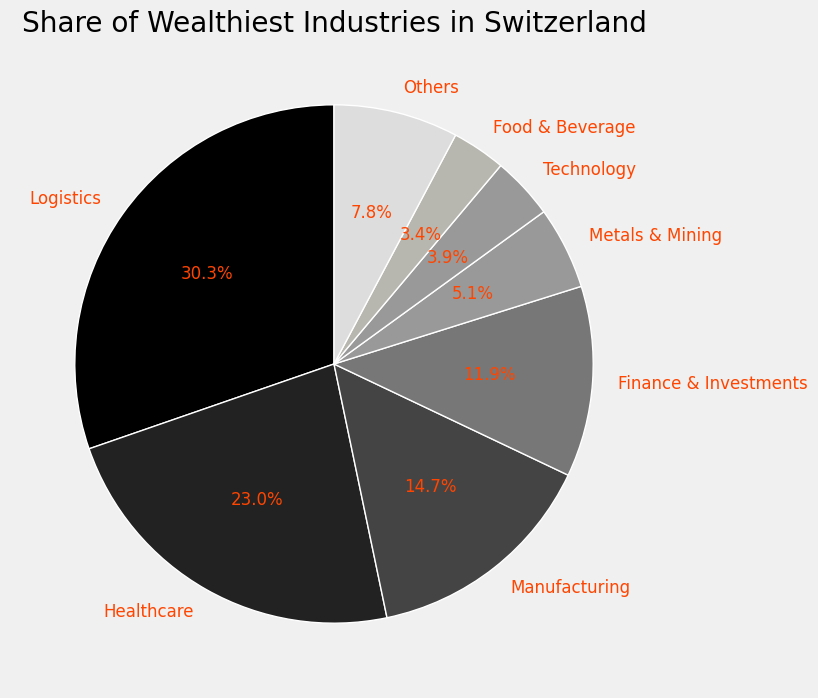

In [79]:
highest_wealth_countries = df.groupby('country')['net_worth'].sum().sort_values(ascending=False)
highest_wealth_countries = highest_wealth_countries.index 

filter_df = df[df['country']=='Switzerland']

top_country_industry_share = filter_df.groupby('industry')['net_worth'].sum().sort_values(ascending=False)
top_country_industry_share

plt.figure(figsize=(8,8))

top7_industry = top_country_industry_share[:7]
other_industry = top_country_industry_share[7:].sum().round()

labels = list(top7_industry.index) + ['Others']

values = list(top7_industry.values) + [other_industry]

colors = ['#000000', '#222222', '#444444', '#777777', '#999999', '#999999', '#b7b6af', '#dddddd'] 

wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}
textprops = {'color': 'Orangered', 'size':12}

plt.pie(values, labels=labels,colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops, textprops=textprops)

plt.title("Share of Wealthiest Industries in Switzerland")
plt.show()

### What is the count of unique sources of wealth among billionaires?

In [80]:
networth_source_count = df['source'].nunique()
networth_source_count

902

### What are the most popular sources of wealth for billionaires?

In [81]:
popular_sources = df['source'].value_counts().sort_values(ascending=False)
popular_sources

source
Real estate                    151
Investments                     92
Diversified                     91
Pharmaceuticals                 85
Software                        63
                              ... 
Liquor stores, supermarkets      1
Brewery                          1
Lithium-ion battery cap          1
Investments, art                 1
Online universities              1
Name: count, Length: 902, dtype: int64

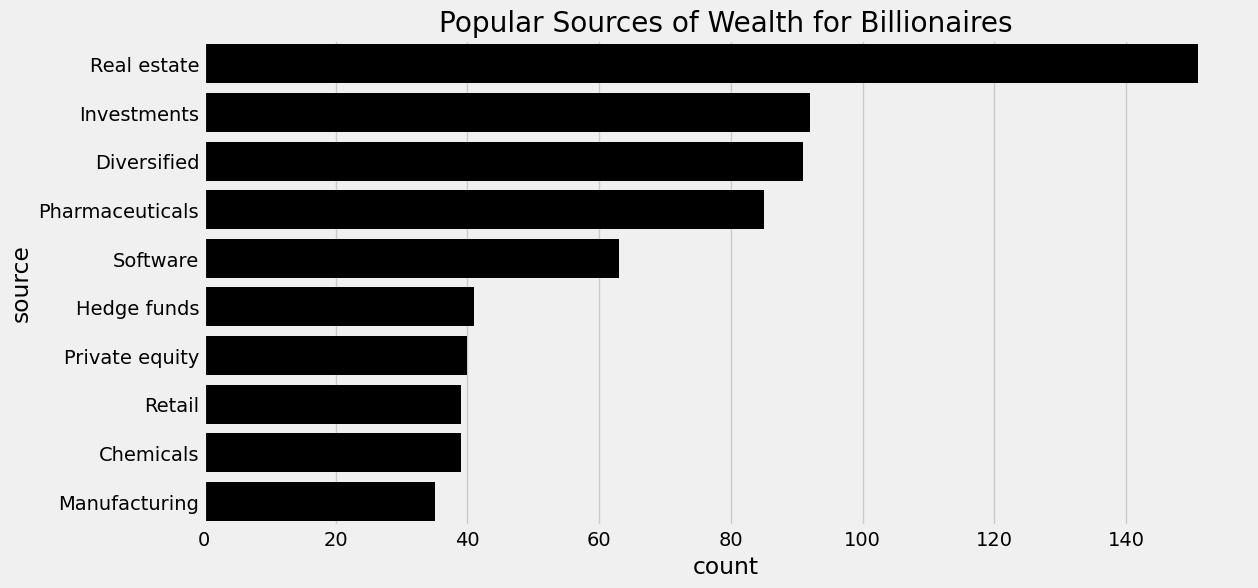

In [82]:
plt.figure(figsize=(12,6))

popular_sources = popular_sources.head(10)

sns.barplot(data=df, x=popular_sources.values, y=popular_sources.index, order=popular_sources.index, color='black')

plt.xlabel('count')
plt.ylabel('source')
plt.title('Popular Sources of Wealth for Billionaires')
plt.show()

### Which source holds the highest amount of wealth?

In [83]:
popular_wealth_sources = df.groupby('source')['net_worth'].sum().sort_values(ascending=False)
popular_wealth_sources

source
Real estate                   539.0
Diversified                   395.1
Investments                   345.0
Hedge funds                   271.3
Pharmaceuticals               254.3
                              ...  
Tiles                           1.0
IT consulting, outsourcing      1.0
Industrial lasers               1.0
Power                           1.0
Office real estate              1.0
Name: net_worth, Length: 902, dtype: float64

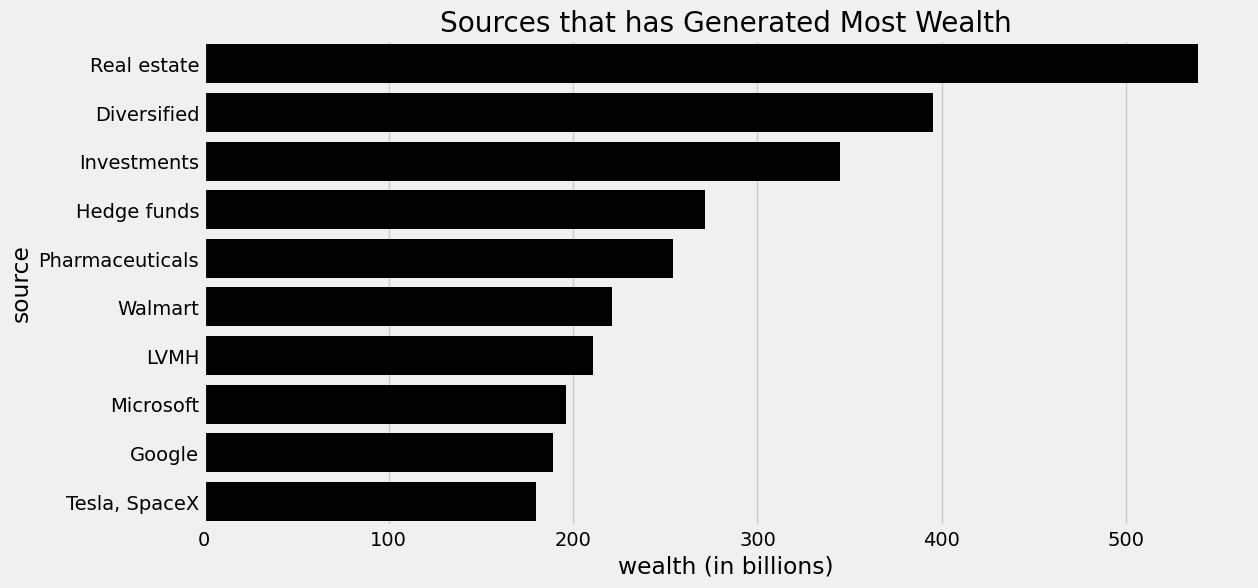

In [84]:
plt.figure(figsize=(12,6))

popular_wealth_sources = popular_wealth_sources.head(10)

sns.barplot(data=df, x=popular_wealth_sources.values, y=popular_wealth_sources.index, order=popular_wealth_sources.index, color='black')

plt.xlabel('wealth (in billions)')
plt.ylabel('source')
plt.title('Sources that has Generated Most Wealth')
plt.show()

### What is the share of source wealth for the country with the highest wealth?

In [85]:
highest_wealth_countries = df.groupby('country')['net_worth'].sum().sort_values(ascending=False)
highest_wealth_countries

country
United States    4490.8
China            1668.3
India             674.8
France            590.0
Germany           585.4
                  ...  
Macau               1.3
Estonia             1.3
Armenia             1.2
Panama              1.0
Bangladesh          1.0
Name: net_worth, Length: 77, dtype: float64

In [86]:
wealthy_countries = highest_wealth_countries.head(10).index  

# Filter the DataFrame to include only the selected wealthy countries
filtered_df = df[df['country'].isin(wealthy_countries)]

country_popular_sources = filtered_df.groupby(['country', 'source'])['net_worth'].sum().sort_values(ascending=False)
country_popular_sources = country_popular_sources.groupby(level=0).head(1).reset_index()
country_popular_sources

,country,source,net_worth
0,United States,Hedge funds,235.6
1,France,LVMH,211.0
2,Hong Kong,Real estate,129.9
3,India,Diversified,119.7
4,China,E-commerce,92.0
5,Switzerland,Shipping,62.4
6,Canada,Media,56.2
7,Germany,Retail,53.5
8,Italy,"Nutella, chocolates",40.9
9,Russia,Metals,31.4


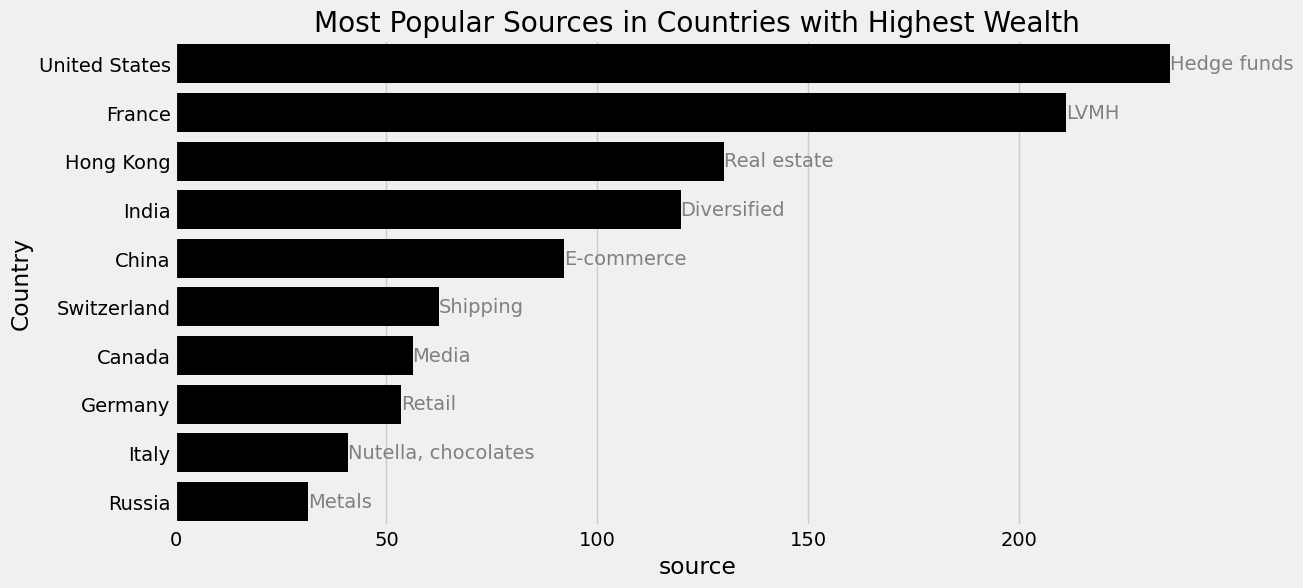

In [113]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=country_popular_sources, y='country', x='net_worth', color='Black')

for i, row in enumerate(country_popular_sources.iterrows()):
    ax.text(row[1]['net_worth'], i, row[1]['source'], color='gray', va='center')

plt.xlabel('source')
plt.ylabel('Country')
plt.title('Most Popular Sources in Countries with Highest Wealth')
plt.show()

### What are the sources of wealth that have the youngest billionaires?

In [111]:
filter_nan = df[df['age'].notnull()]

source_youngest_age = filter_nan.groupby('source')['age'].mean().sort_values().reset_index()
source_youngest_age

,source,age
0,Eyeglases,18.0
1,Online gaming,20.0
2,E-commerce software,28.0
3,Fish farming,29.0
4,Fitness clothing,30.0
...,...,...
891,Fashion retailer,97.0
892,Slim-Fast,98.0
893,"Mining, banking",98.0
894,"Palm oil, shipping, property",99.0


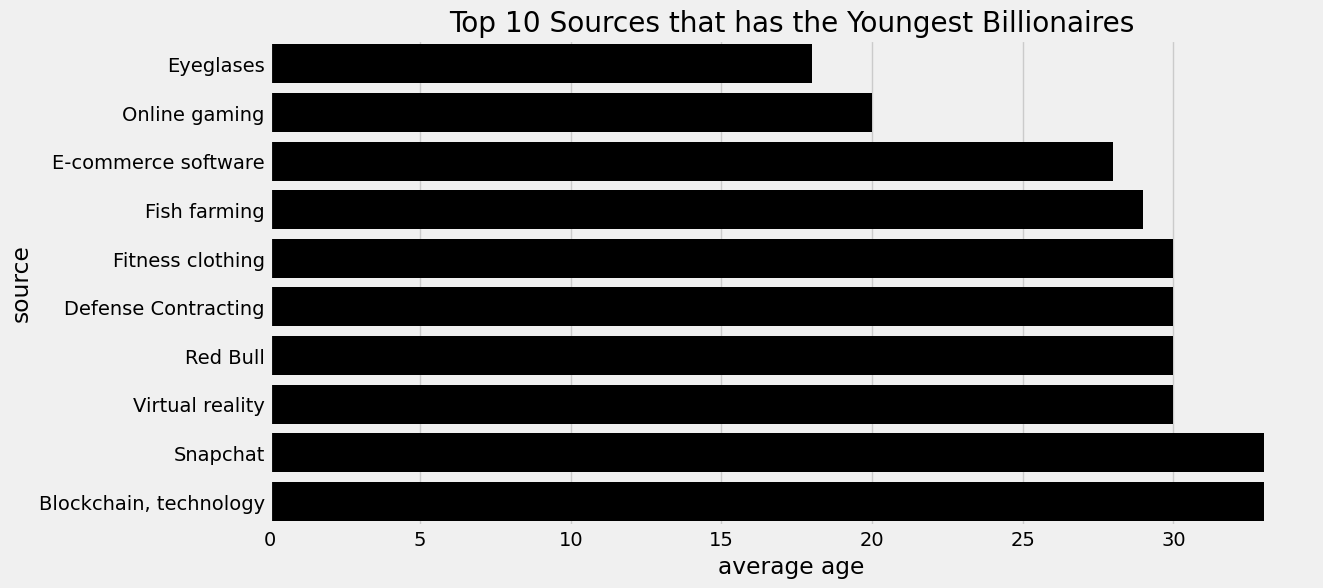

In [114]:
plt.figure(figsize=(12, 6))

source_youngest_age = source_youngest_age.head(10)
sns.barplot(data=source_youngest_age, y='source', x='age', color='Black')

plt.xlabel('average age')
plt.ylabel('source')
plt.title('Top 10 Sources that has the Youngest Billionaires')
plt.show()